# ALY6980 Capstone Project
# Team4

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/Research Group'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Research Group


## Import Libraries and Data

In [ ]:
#!pip install texthero -U
!pip install gensim
!pip install pyLDAvis==2.1.2

In [67]:
# data manipulation
import pandas as pd
import numpy as np
import io 

# plot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib.colors as mcolors

# natural language processing
import re
import nltk
from nltk.tokenize import TweetTokenizer
import string
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import texthero as hero 
from texthero import preprocessing
from textblob import TextBlob 
from gensim.models import LdaModel
from gensim import models
from gensim import corpora
import pyLDAvis.gensim
from wordcloud import WordCloud, STOPWORDS

# model building 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# neural network 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# model evaluation
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [3]:
df=pd.read_csv('AllTagged.csv')

In [4]:
df.head()

,ID,AuthorID,Author,Date,Content,Words,"Change in appetite, losing or gaining weight",Sleeping too much or not sleeping well (insomnia),Fatigue and low energy most days,"Feeling worthless, guilty, and hopeless","An inability to focus and concentrate that may interfere with daily tasks at home, work, or school",Movements that are unusually slow or agitated (a change which is often noticeable to others),Thinking about death and dying; suicidal ideation or suicide attempts,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,**List of International Suicide Hotlines**\n``...,72,N,N,N,N,N,N,N,Y
1,2,4.560000e+17,Deleted User#0000,43630.78611,"Hello, if you're depressed, being self-depreca...",56,N,N,N,Y,N,N,Y,N
2,3,4.680000e+17,angel?#5373,43630.84306,Please note that we are not professionals. Th...,61,N,N,N,N,N,N,N,Y
3,4,5.450000e+17,Sease#2410,43630.84514,yeah and people who just want attention don't ...,36,N,N,N,N,N,N,N,Y
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,Just a small vent my arm hurts so much i know ...,41,N,N,N,Y,Y,Y,N,N


In [5]:
df=df.dropna()

In [6]:
list(df)

['ID',
 'AuthorID',
 'Author',
 'Date',
 'Content',
 'Words',
 'Change in appetite, losing or gaining weight',
 'Sleeping too much or not sleeping well (insomnia)',
 'Fatigue and low energy most days',
 'Feeling worthless, guilty, and hopeless',
 'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school',
 'Movements that are unusually slow or agitated (a change which is often noticeable to others)',
 'Thinking about death and dying; suicidal ideation or suicide attempts',
 'None']

In [7]:
df.isnull().sum()

ID                                                                                                    0
AuthorID                                                                                              0
Author                                                                                                0
Date                                                                                                  0
Content                                                                                               0
Words                                                                                                 0
Change in appetite, losing or gaining weight                                                          0
Sleeping too much or not sleeping well (insomnia)                                                     0
Fatigue and low energy most days                                                                      0
Feeling worthless, guilty, and hopeless                         

In [8]:
df['None'] = df['None'].map({'Y': 1, 'N': 0})
df['Change in appetite, losing or gaining weight']=df['Change in appetite, losing or gaining weight'].map({'Y': 1, 'N': 0})
df['Sleeping too much or not sleeping well (insomnia)']=df['Sleeping too much or not sleeping well (insomnia)'].map({'Y': 1, 'N': 0})
df['Fatigue and low energy most days']=df['Fatigue and low energy most days'].map({'Y': 1, 'N': 0})
df['Feeling worthless, guilty, and hopeless']=df['Feeling worthless, guilty, and hopeless'].map({'Y': 1, 'N': 0})
df['An inability to focus and concentrate that may interfere with daily tasks at home, work, or school']=df['An inability to focus and concentrate that may interfere with daily tasks at home, work, or school'].map({'Y': 1, 'N': 0})
df['Movements that are unusually slow or agitated (a change which is often noticeable to others)']=df['Movements that are unusually slow or agitated (a change which is often noticeable to others)'].map({'Y': 1, 'N': 0})
df['Thinking about death and dying; suicidal ideation or suicide attempts']=df['Thinking about death and dying; suicidal ideation or suicide attempts'].map({'Y': 1, 'N': 0})

In [9]:
df.rename(columns={"Change in appetite, losing or gaining weight": "symp_one", "Sleeping too much or not sleeping well (insomnia)": "symp_two",
                  "Fatigue and low energy most days":'symp_three','Feeling worthless, guilty, and hopeless':'symp_four',
                  'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school':'symp_five',
                  'Movements that are unusually slow or agitated (a change which is often noticeable to others)':'symp_six',
                  'Thinking about death and dying; suicidal ideation or suicide attempts':'symp_seven'},inplace=True)

In [11]:
df.head(10)

,ID,AuthorID,Author,Date,Content,Words,symp_one,symp_two,symp_three,symp_four,symp_five,symp_six,symp_seven,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,**List of International Suicide Hotlines**\n``...,72,0,0,0,0.0,0,0,0.0,1.0
1,2,4.560000e+17,Deleted User#0000,43630.78611,"Hello, if you're depressed, being self-depreca...",56,0,0,0,1.0,0,0,1.0,0.0
2,3,4.680000e+17,angel?#5373,43630.84306,Please note that we are not professionals. Th...,61,0,0,0,0.0,0,0,0.0,1.0
3,4,5.450000e+17,Sease#2410,43630.84514,yeah and people who just want attention don't ...,36,0,0,0,0.0,0,0,0.0,1.0
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,Just a small vent my arm hurts so much i know ...,41,0,0,0,1.0,1,1,0.0,0.0
5,6,3.030000e+17,Emma/Blue#2035,43630.86597,They do where I live I had to call 911 before ...,19,0,0,0,0.0,0,0,0.0,1.0
6,7,3.030000e+17,Emma/Blue#2035,43630.86667,I don‚Äôt want to seem like I‚Äôm saying no to...,22,0,0,0,0.0,0,0,0.0,1.0
7,8,5.290000e+17,‚ô°ghost girl#4650,43630.86806,"damn it seems really bad, and your parents hav...",17,0,0,0,0.0,0,0,0.0,1.0
8,9,3.030000e+17,Emma/Blue#2035,43630.86944,They don‚Äôt have the money and don‚Äôt want t...,17,0,0,0,0.0,0,0,0.0,1.0
9,10,3.030000e+17,Emma/Blue#2035,43630.87292,I get a lot of shooting pains from my nerves l...,28,0,0,0,0.0,0,0,0.0,1.0


In [12]:
categorical_features=df.select_dtypes(include=['object'])
categorical_features

,Author,Date,Content,Words
0,Deleted User#0000,43630.77639,**List of International Suicide Hotlines**\n``...,72
1,Deleted User#0000,43630.78611,"Hello, if you're depressed, being self-depreca...",56
2,angel?#5373,43630.84306,Please note that we are not professionals. Th...,61
3,Sease#2410,43630.84514,yeah and people who just want attention don't ...,36
4,Emma/Blue#2035,43630.85347,Just a small vent my arm hurts so much i know ...,41
...,...,...,...,...
23989,AfonsoHackers#6969,44071.59167,> And it‚Äôs just getting so annoying and I‚Äô...,26
23990,sluttywhoreü¶¶#3156,44071.59236,And I‚Äôm mixed so I get called the n word wit...,18
23991,SAD BHABHIE.#3636,44071.59236,> @SAD BHABHIE. oof that's a good thing I supp...,50
23992,SAD BHABHIE.#3636,44071.59236,> And I‚Äôm mixed so I get called the n word w...,21


## Cleaning Text Data

Tokenize text

In [14]:
tt = TweetTokenizer()
tokens = df['Content'].apply(tt.tokenize)
print(tokens)

0        [*, *, List, of, International, Suicide, Hotli...
1        [Hello, ,, if, you're, depressed, ,, being, se...
2        [Please, note, that, we, are, not, professiona...
3        [yeah, and, people, who, just, want, attention...
4        [Just, a, small, vent, my, arm, hurts, so, muc...
                               ...                        
23989    [>, And, it, ‚, Äôs, just, getting, so, annoyi...
23990    [And, I, ‚, Äôm, mixed, so, I, get, called, th...
23991    [>, @SAD, BHABHIE, ., oof, that's, a, good, th...
23992    [>, And, I, ‚, Äôm, mixed, so, I, get, called,...
23993    [>, Yeah, I, ‚, Äôve, ignored, it, for, 5, yea...
Name: Content, Length: 23978, dtype: object


Cleaning the Content with multiple commas

In [15]:
df['Content']=df['Content'].apply(lambda x: x.split(',,')[0])


In [16]:
df['Content']=df['Content'].apply(lambda x: x.split(',,,')[0])


Expand contractions; Lowercase the reviews; Remove digits and words containing digits; Remove punctuations

In [17]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['Content']=df['Content'].apply(lambda x:expand_contractions(x))

Lowercase the comments

In [18]:
df['Content']=df['Content'].apply(lambda x: x.lower())


Remove digits and words containing digits


In [19]:
df['Content']=df['Content'].apply(lambda x: re.sub('\w*\d\w*','', x))


Remove Punctuations


In [20]:
df['Content']=df['Content'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


Removing Extra Spaces

In [21]:
df['Content']=df['Content'].apply(lambda x: re.sub(' +',' ',x))


Looking at the text after cleaning

In [22]:
for index,text in enumerate(df['Content'][35:40]):
  print('content %d:\n'%(index+1),text)

content 1:
 not enough apparently if you were helping yourself over span of several years you would be feeling a lot better
content 2:
 i do try to do it but when everyone fucking criticizes you on every fucking small detail it makes it worse ok
content 3:
 so i‚äôve been trying and i‚äôve tried and tried and tried so don‚äôt act like i‚äôm not trying to get out of this shit
content 4:
 the misconception of trying is that people think trying is enough if it does not work it is hopeless
you do not try to be a better person you have to actively be a better person until it is internalized to the point where you do not even have to try you are by default
same with gym for example you do not try to go to gym lazily and skipping few days and when you do not achieve your goal you will say i tried it is mostly crap
trying never works because it is often forced ungenuine and tries to adapt to your comfort instead of something fundamentally changing and actively done
content 5:
 so i will not sa

Removing Stopwords and Lemmatization

In [23]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['Content']=df['Content'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


The final dataset 

In [30]:
df

,ID,AuthorID,Author,Date,Content,Words,symp_one,symp_two,symp_three,symp_four,symp_five,symp_six,symp_seven,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,list international suicide hotlines \n argenti...,72,0,0,0,0.0,0,0,0.0,1.0
1,2,4.560000e+17,Deleted User#0000,43630.78611,hello depressed selfdeprecate thing bad talk a...,56,0,0,0,1.0,0,0,1.0,0.0
2,3,4.680000e+17,angel?#5373,43630.84306,note professional community try help good abil...,61,0,0,0,0.0,0,0,0.0,1.0
3,4,5.450000e+17,Sease#2410,43630.84514,yeah people want attention actually listen peo...,36,0,0,0,0.0,0,0,0.0,1.0
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,small vent arm hurt know need doctor can‚äôt a...,41,0,0,0,1.0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23989,23995,3.110000e+17,AfonsoHackers#6969,44071.59167,it‚äôs get annoying i‚äôm \n sluttywhoreü¶¶...,26,0,0,0,0.0,0,0,0.0,1.0
23990,23996,6.460000e+17,sluttywhoreü¶¶#3156,44071.59236,i‚äôm mix call n word hard r year,18,0,0,0,1.0,0,0,0.0,0.0
23991,23997,7.240000e+17,SAD BHABHIE.#3636,44071.59236,sad bhabhie oof good thing suppose mean find...,50,0,0,0,0.0,0,0,0.0,1.0
23992,23998,7.240000e+17,SAD BHABHIE.#3636,44071.59236,i‚äôm mixed call n word hard r year \n slutt...,21,0,0,0,1.0,0,0,0.0,0.0


Split the data into depression diagnosis training set and validation set\
Use 80% for symptom model training and validation, and 20% for depression diagnostic validation

In [25]:
df_train = df.sample(frac=0.8, random_state=1000)
df_test = df.drop(df_train.index)

In [26]:
df_train.shape

(19182, 15)

In [27]:
df_test.shape

(4796, 15)

## Exploratory Data Analysis

Distribution of text length

Text(0, 0.5, 'Frequency of Text Length')

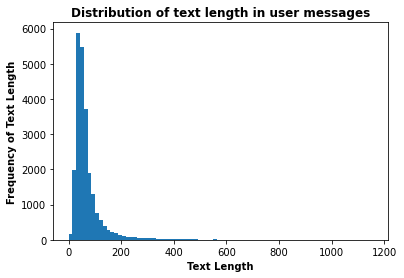

In [31]:
# add a new column, the length of the content column
df['length']=df['Content'].apply(len)

#distribution of length
df['length'].plot.hist(bins=80)
plt.title('Distribution of text length in user messages', fontweight='bold')
plt.xlabel("Text Length", fontweight='bold')
plt.ylabel("Frequency of Text Length", fontweight='bold')

Grouping the Content as per user's

In [32]:
df_grouped=df[['Author','Content']].groupby(by='Author').agg(lambda x:' '.join(x))
df_grouped.head()

,Content
Author,
! Daddy Rey#3248,year old mad make joke cheer people lmfaoo wan...
!Nunu#9000,good thing u breaking love makeover day hard k...
!neo#8684,suicide isn‚äôt answer pass problem people cha...
$>sp7r7t<$#0773,blame pain side spectrum bad feeling world per...
(T y l e r)#5353,care ô£ø√º√≠√ø recently lose family member get...


Creating a Document Term Matrix

In [33]:
# Creating Document Term Matrix
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['Content'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaa,aaaandd,aaah,aaand,aabout,aahh,aand,aandth,aaron,ab,abandon,abandoned,abandonment,abandonne,abd,abdominal,abel,abhorent,abide,ability,abiout,abird,abit,abitchangry,abiut,able,ablebodie,ablento,ablobnervous,abnormal,abo,aboit,abomination,aboout,aboriginal,abort,abortion,abot,abotu,...,üíô,üíö,üíú,üíúdreamerthewolffox,üíúkameko,üíû,üî,üñ,üò,üòª,üòá,üòâ,üòã,üòä,üòå,üòç,üòé,üòê,üòë,üòì,üòî,üòï,üòñ,üòó,üòö,üòú,üòû,üòü,üô,üôã,üôå,üôç,üôè,üôé,üôñ,œµ,œâ,œâœπœ,œä,πô
Author,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
! Daddy Rey#3248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
!Nunu#9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
!neo#8684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# creating a custom pipeline to preprocess the raw text we have
df_grouped['Content'] = hero.remove_stopwords(df_grouped['Content'])
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                  #, preprocessing.remove_digits # you can uncomment this if you want to remove digits as well.
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace
                   , preprocessing.stem]

# simply call clean() method to clean the raw text in 'tweet' col and pass the custom_pipeline to pipeline argument
df_grouped['Content'] = hero.clean(df_grouped['Content'], pipeline = custom_pipeline)

In [45]:
print(df_grouped)

                                                                           Content
Author                                                                            
! Daddy Rey#3248                 year old mad make joke cheer peopl lmfaoo want...
!Nunu#9000                       good thing u break love makeov day hard keep c...
!neo#8684                        suicid aot answer pass problem peopl chanc day...
$>sp7r7t<$#0773                  blame pain side spectrum bad feel world person...
(T y l e r)#5353                   care oooo recent lose famili member get tab bit
...                                                                            ...
üíúKamekoüíú#5107              suppos stress make stress oao lol matter think...
üíû~ùòãùò¶ùò∏ùò∫~üíï#6367  mean let know ao interest sexual relat use pro...
üñ§Writer_By_Nightüñ§#7103     feel work long close like close peopl start no...
üòàüòàüòà‚ù§#3570             zoink scoob u goodby u love hope u kitter ur a...
ü•Ä

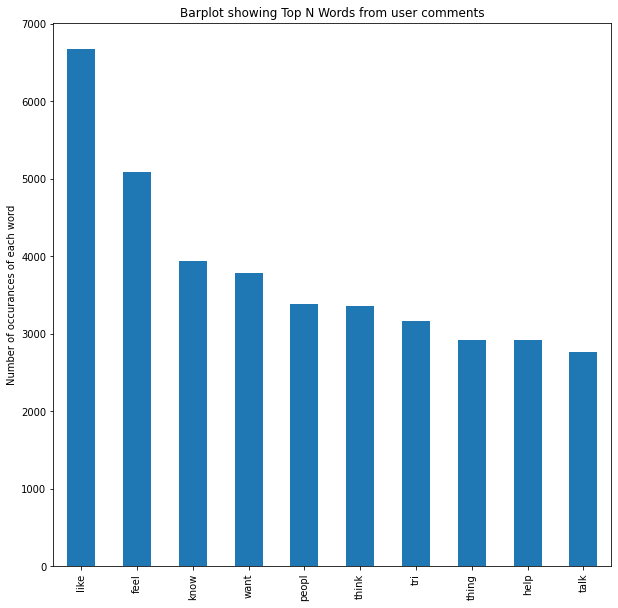

In [46]:
# using top_words() method, get the top N words and make a bar plot.
hero.top_words(df_grouped['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Barplot showing Top N Words from user comments')
plt.ylabel('Number of occurances of each word')
plt.show()


In [47]:
top_words=hero.top_words(df_grouped['Content'])

In [49]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
#add a list of stopwords to the stopwords
stop_w = ["get", "know", "peopl", "think", "go", "thing", "thi", "talk", "time", "friend", "tri", "want", "feel", "make", "like", "one", "realli", "say", "could", "got", "see", "also", "wanna", "look", "mayb", "keep", "still", "way", "aony", "im", "me", "you", "aot", "said", "day", "=", "i", "would", "right", "alway", "happen", ",", ".", "aon", "aom"]
custom_stopwords = default_stopwords.union(set(stop_w))
#Call remove_stopwords and pass the custom_stopwords list
df_grouped['Content'] = hero.remove_stopwords(df_grouped['Content'], custom_stopwords)

Top N words after removing Stopwords

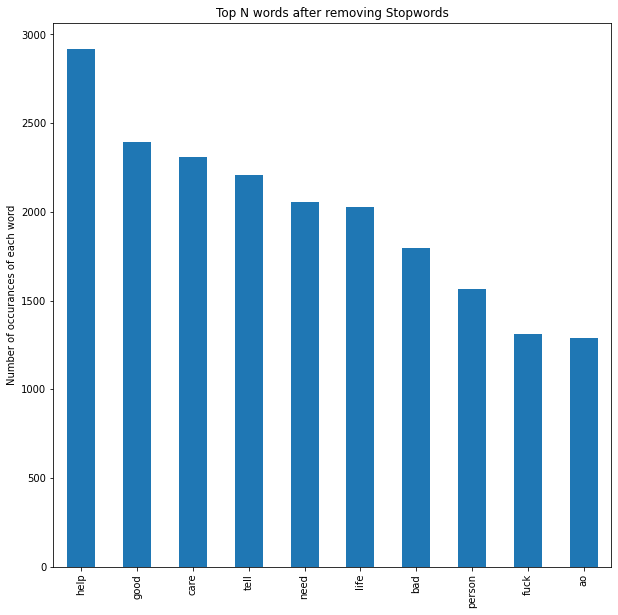

In [50]:
hero.top_words(df_grouped['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Top N words after removing Stopwords')
plt.ylabel('Number of occurances of each word')
plt.show()

Word Cloud Visualization

Text(0.5, 1.0, 'Wordcloud showing top N words')

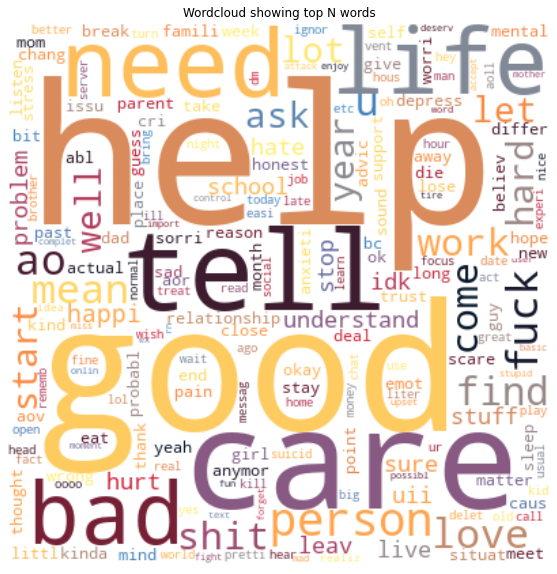

In [51]:
hero.visualization.wordcloud(df_grouped['Content'],width = 400, height= 400,background_color='White')
plt.title('Wordcloud showing top N words')

Topic Modeling LDA

In [52]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(df.Content)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [53]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [55]:
tokenized_reviews = pd.Series(df_grouped.Content).apply(lambda x: x.split())
print(tokenized_reviews[1])

['good', 'u', 'break', 'love', 'makeov', 'hard', 'check', 'discord', 'well', 'care', 'uii', 'betray', 'great', 'stab', 'idk', 'pls', 'help', 'unknown', 'dude', 'answer', 'trip', 'school', 'nurs', 'appoint', 'fall', 'ground', 'u', 'addict', 'person', 'die', 'ur', 'life', 'ur', 'brain', 'u', 'depress', 'dull', 'work', 'cuz', 'teenag', 'natur', 'moodi', 'pressur', 'school', 'famili', 'happi', 'happi', 'long', 'term', 'understand', 'u', 'end', 'care', 'let', 'person', 'ur', 'attent', 'fill', 'ur', 'hobbi', 'relationship', 'ur', 'life', 'balanc', 'possibl', 'mom', 'person', 'date', 'ask', 'end', 'kid', 'mom', 'bad', 'karma', 'mom', 'upset', 'mad', 'cuz', 'famili', 'come', 'cuz', 'relationship', 'end', 'boom', 'vanish', 'guess', 'stay', 'u', 'matter', 'stupid', 'u', 'act', 'ur', 'famili', 'logic', 'harsh', 'u', 'healthi', 'good', 'life', 'decis', 'end', 'u', 'break', 'u', 'love', 'brain', 'chemistri', 'chang', 'affect', 'ur', 'perform']


In [56]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['hard', 'check', 'discord', 'unknown', 'dude', 'answer', 'trip', 'school', 'nur', 'addict', 'person', 'life', 'brain', 'depress', 'dull', 'work', 'long', 'term', 'end', 'care', 'person', 'fill', 'hobbi', 'relationship', 'person', 'date', 'end', 'mom', 'mad', 'relationship', 'end', 'boom', 'vanish', 'guess', 'matter', 'logic', 'good', 'life', 'break', 'love', 'brain']


In [58]:
dictionary = corpora.Dictionary(reviews_2)

In [59]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [60]:
# Build LDA model
lda_model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [65]:
lda_model.print_topics()

[(0,
  '0.016*"hard" + 0.010*"help" + 0.010*"depress" + 0.008*"good" + 0.008*"year" + 0.008*"month" + 0.008*"end" + 0.007*"bed" + 0.007*"reason" + 0.007*"bad"'),
 (1,
  '0.028*"bad" + 0.018*"help" + 0.017*"good" + 0.015*"person" + 0.013*"care" + 0.011*"lot" + 0.010*"stuff" + 0.010*"sad" + 0.010*"year" + 0.009*"actual"'),
 (2,
  '0.008*"plan" + 0.006*"close" + 0.006*"class" + 0.006*"work" + 0.006*"hair" + 0.005*"server" + 0.004*"ion" + 0.004*"jail" + 0.004*"test" + 0.004*"colleg"'),
 (3,
  '0.014*"attack" + 0.008*"high" + 0.008*"pain" + 0.007*"depress" + 0.007*"mind" + 0.006*"work" + 0.006*"money" + 0.005*"brain" + 0.005*"help" + 0.004*"pill"'),
 (4,
  '0.025*"good" + 0.025*"help" + 0.020*"person" + 0.020*"life" + 0.015*"bad" + 0.011*"love" + 0.010*"work" + 0.010*"care" + 0.008*"relationship" + 0.008*"lot"'),
 (5,
  '0.020*"bad" + 0.017*"good" + 0.014*"shit" + 0.014*"life" + 0.014*"care" + 0.014*"help" + 0.013*"work" + 0.012*"stuff" + 0.012*"mom" + 0.011*"problem"'),
 (6,
  '0.016*"prob

In [62]:
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

In [63]:
pd.options.mode.chained_assignment = None 
random_state = 20181126
ldamodel = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=30, random_state=random_state)
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.067*"the" + 0.037*"of" + 0.030*"," + 0.029*"a" + 0.025*"in" + 0.022*"to"')
(1, '0.072*"I" + 0.060*"." + 0.037*"," + 0.030*"and" + 0.030*"a" + 0.026*"my"')
(2, '0.057*"*" + 0.033*":" + 0.030*"-" + 0.029*"\'" + 0.023*"¬" + 0.020*"|"')
(3, '0.129*"I" + 0.080*"‚" + 0.038*"to" + 0.021*"Äôt" + 0.020*"and" + 0.020*"me"')
(4, '0.055*"and" + 0.048*"her" + 0.045*"she" + 0.033*"he" + 0.032*"me" + 0.029*"was"')
(5, '0.052*"you" + 0.045*"to" + 0.035*"," + 0.034*"it" + 0.032*"and" + 0.022*"the"')
(6, '0.102*"i" + 0.035*"to" + 0.033*"and" + 0.021*"me" + 0.020*"my" + 0.019*"but"')
(7, '0.066*"you" + 0.045*"." + 0.045*"," + 0.042*"to" + 0.020*"that" + 0.017*"?"')
(8, '0.271*"√" + 0.097*"Äö" + 0.089*"¥" + 0.086*"‚" + 0.034*"t" + 0.026*"£"')
(9, '0.118*"Ñ" + 0.033*")" + 0.032*"(" + 0.029*"!" + 0.012*"a" + 0.012*"or"')


In [66]:
titles = {df_grouped.Content.loc[i] : i for i in df_grouped.index.values}

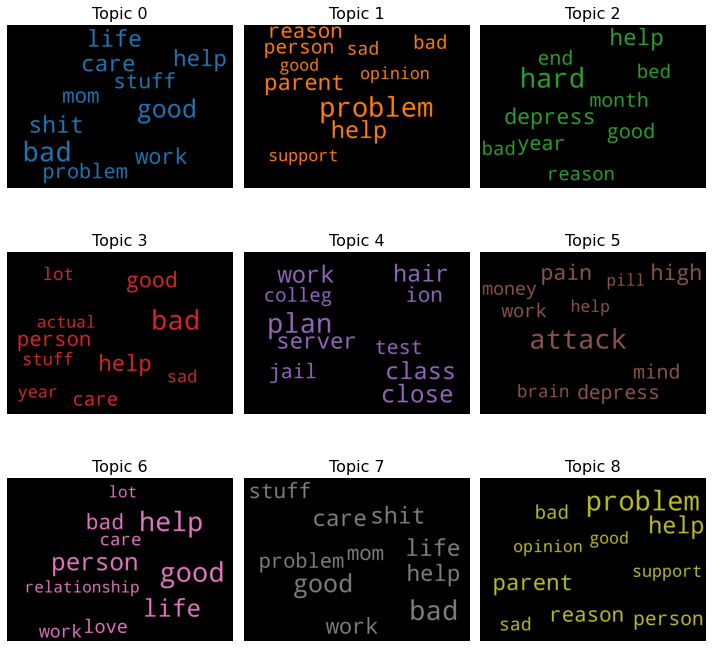

In [68]:
# 1. Wordcloud of Top N words in each topic
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(stopwords=stop_words,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i-2][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [69]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [70]:
# Applying Lambda function on comments column to notice positive sentiment among customers. For this, we search for comments like "good, great, like, best, enjoy."
searchfor = ['good', 'great', 'like', 'best', 'enjoy','must', 'love', 'clean']
df_grouped["positive_sentiment"] = df_grouped['Content'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0) 
df_grouped.tail(6)

,Content,positive_sentiment
Author,,
üíúDreamerTheWolfFoxüíö#7237,stuff find manhattan bridg bodi find river ago,0
üíúKamekoüíú#5107,suppos stress stress oao lol matter suicid m...,1
üíû~ùòãùò¶ùò∏ùò∫~üíï#6367,mean let ao interest sexual relat use protect...,0
üñ§Writer_By_Nightüñ§#7103,work long close close start notic justterri...,1
üòàüòàüòà‚ù§#3570,zoink scoob u goodby u love hope u kitter ur ...,1
ü•ÄSomiü•Ä#9186,dr nurs school aod antibiot u neosporin cover,0


Performing Basic Sentiment Analysis:

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity).

The polarity score is a float within the range [-1.0, 1.0].

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [71]:
df_grouped[['polarity', 'subjectivity']] = df_grouped['Content'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment)) #Checking polarity and subjectivity using sentiment property
df_grouped

,Content,positive_sentiment,polarity,subjectivity
Author,,,,
! Daddy Rey#3248,year old mad joke cheer lmfaoo lmao u bout...,0,-0.084524,0.542857
!Nunu#9000,good u break love makeov hard check discord...,1,0.005357,0.613690
!neo#8684,suicid answer pass problem chanc negat ...,0,0.000000,0.000000
$>sp7r7t<$#0773,blame pain side spectrum bad world person h...,1,-0.035417,0.592361
(T y l e r)#5353,care oooo recent lose famili member tab bit,0,0.000000,0.250000
...,...,...,...,...
üíúKamekoüíú#5107,suppos stress stress oao lol matter suicid m...,1,-0.004346,0.553068
üíû~ùòãùò¶ùò∏ùò∫~üíï#6367,mean let ao interest sexual relat use protect...,0,0.044494,0.630208
üñ§Writer_By_Nightüñ§#7103,work long close close start notic justterri...,1,-0.107572,0.559550


CONCLUSION:

Polarity & Subjectivity Interpretation for top3:

Author - 0.44 defines the polarity of the sentence is slightly positive and subjectivity value 0.53 indicates it is fairly subjective.

Author - 0.50 indicates neutral positivity and subjectivity value 0.675 indicates that the statement is fairly subjective.

Author - 0.0 indicates that the statement shows neutral polarity and very objective.

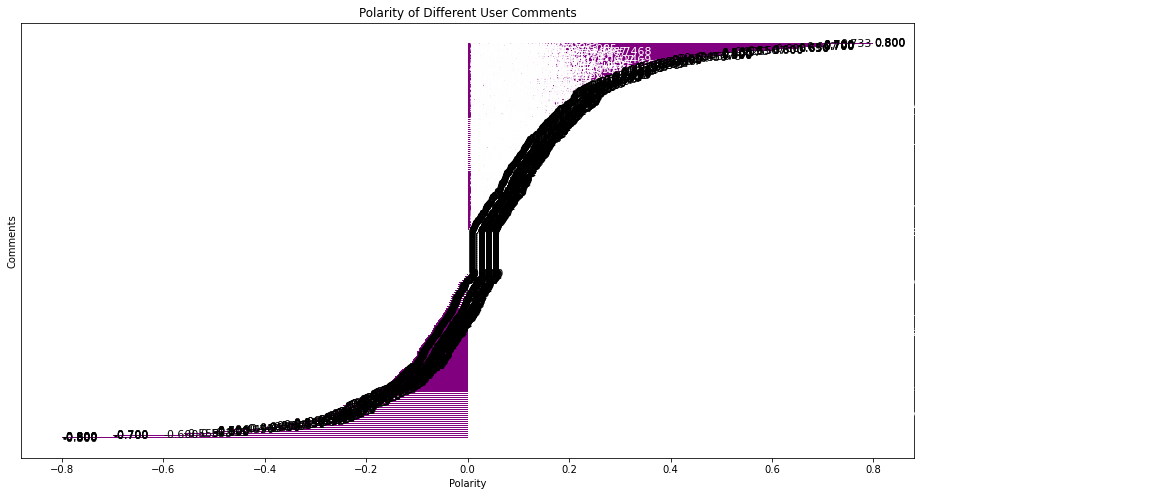

In [72]:
Author_polarity_sorted=pd.DataFrame(df_grouped.groupby('Author')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Comments')
plt.title('Polarity of Different User Comments')
polarity_graph=plt.barh(np.arange(len(Author_polarity_sorted.index)),Author_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,Author in zip(polarity_graph,Author_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(Author),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,Author_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

## Build Sub Models for Each Symptom

In [ ]:
# Assign df_train back to df for simplicity
df = df_train

In [ ]:
# Define a function to plot AUC metric
def plot_auc(dep_test, preds):
  fpr, tpr, t = roc_curve(dep_test, preds, pos_label=1)
  auc_score = roc_auc_score(dep_test, preds)

  base = [0 for i in range(len(dep_test))]
  fpr0, tpr0, t0 = roc_curve(dep_test, base, pos_label=1)

  print('AUC:', auc_score)

  plt.plot(fpr, tpr, linestyle='-',color='green', label='Naive Bayes')
  plt.plot(fpr0, tpr0, linestyle='--', color='blue')

  plt.title('ROC')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')

  plt.legend()
  plt.show();

In [ ]:
# Define a function to plot training history for neural network 
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Symptom 1

In [ ]:
# Set indicator for symptoms except symp 1 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [ ]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

Visualiazation

Text(0.5, 1.0, 'The number of each symptom ')

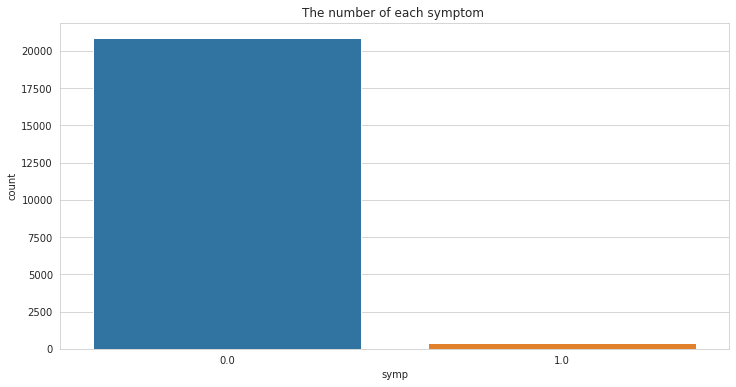

In [ ]:
sns.countplot(x="symp", data=df_trans)
plt.title('The number of each symptom ')

In [ ]:
# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)

Text(0.5, 1.0, 'The distribution of text length')

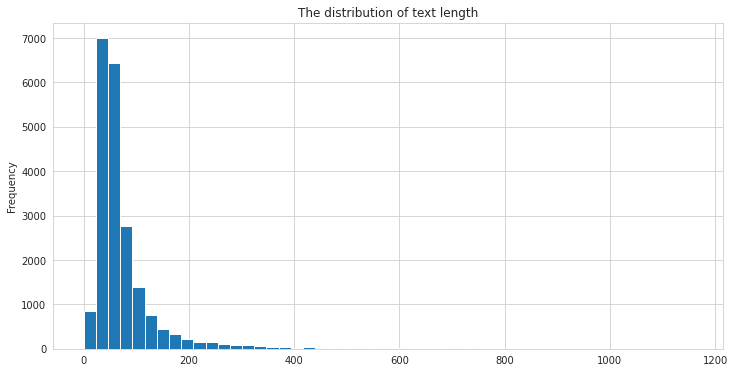

In [ ]:
#distribution of length
df_trans['length'].plot.hist(bins=50)
plt.title('The distribution of text length for symptom 1')

In [ ]:
df_trans['length'].describe()

count    21210.000000
mean        75.945167
std         77.797113
min          0.000000
25%         40.000000
50%         54.000000
75%         81.000000
max       1157.000000
Name: length, dtype: float64

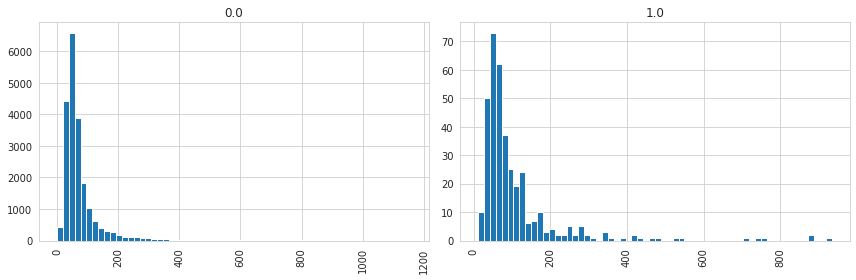

In [ ]:
# The distribution of text length of each symptom
df_trans.hist(column='length',by='symp',bins=60, figsize=(12,4))
plt.tight_layout()


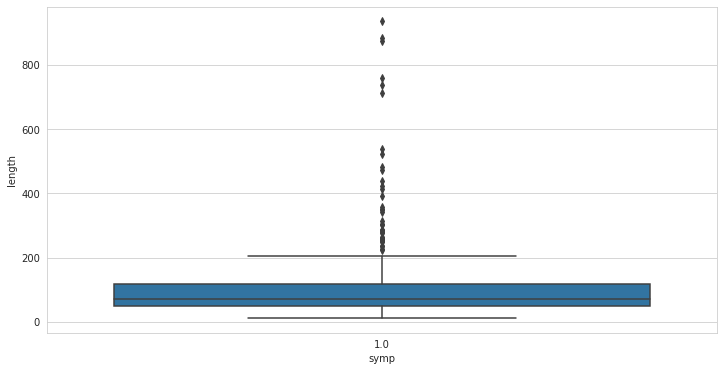

In [ ]:
# symp_one length distribution
sns.boxplot(x='symp',y='length',data=df_trans[df_trans['symp']== 1])

In [ ]:
X=df_trans[['Content']]
y=df_trans['symp'].astype(int)

Over sample to fix imbalance

In [ ]:
# Split train-test data
cont_train, cont_test, dep_train, dep_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# summarize class distribution
print("Before oversampling: ", Counter(dep_train))

# balance data
under = RandomUnderSampler(sampling_strategy=0.4)
over = RandomOverSampler(sampling_strategy="minority")
steps = [('u',under), ('o',over)]
pipeline = Pipeline(steps=steps)
cont_train, dep_train = pipeline.fit_resample(cont_train, dep_train)

# summarize class distribution
print("After oversampling: ", Counter(dep_train))

Before oversampling:  Counter({0: 14602, 1: 245})
After oversampling:  Counter({0: 612, 1: 612})


In [ ]:
# Vectorize text 
vectorizer_sym1 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym1.fit_transform(cont_train[:,0])
cont_train_vec=vectorizer_sym1.transform(cont_train[:,0]).toarray()
cont_test_vec=vectorizer_sym1.transform(cont_test['Content']).toarray()

### Naive Bayes

In [ ]:
clf = GaussianNB()

clf.fit(cont_train_vec, dep_train)

NameError: ignored

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


In [ ]:
plot_auc(dep_test, preds)

In [ ]:
NBCLF1 = clf

### Random Forest

In [ ]:
#n_estimators = [300, 800, 1200]
#max_depth = [5, 15, 25, 30]
#min_samples_split = [5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10] 

#params = dict(n_estimators = n_estimators, max_depth = max_depth,  
             # min_samples_split = min_samples_split, 
             # min_samples_leaf = min_samples_leaf)

#clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(cont_train_vec, dep_train)

#print('Best Model:', clf.best_estimator_)
#print('Best score:', clf.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[5843  398]
 [  52   70]]
Recall   : 0.5737704918032787
Accuracy : 0.9292786421499293


AUC: 0.7549993301830045


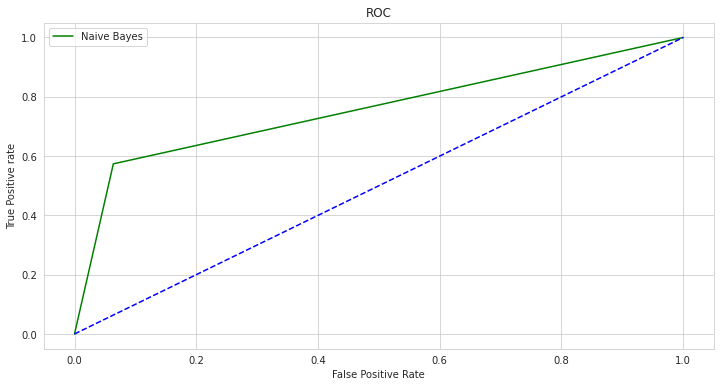

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
RFCLF1 = clf

### SVC

In [ ]:
#Cs = [0.001, 0.01, 0.1, 1, 10]
#gammas = [0.001, 0.01, 0.1, 1]

#params = dict(C = Cs, gamma = gammas)

#clf = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf.fit(cont_train_vec, dep_train)

#print('Best Model:', clf.best_estimator_)
#print('Best score:', clf.best_score_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#preds = clf.best_estimator_.predict(cont_test_vec)
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[5541  700]
 [  55   67]]
Recall   : 0.5491803278688525
Accuracy : 0.8813452773848813


AUC: 0.71850940764537


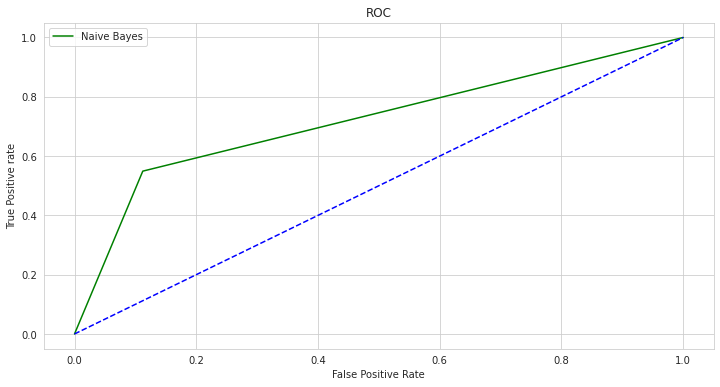

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
SVCCLF1 = clf

### Neural Network Model Keras

In [ ]:
sentences_train = cont_train[:,0]
sentences_test=cont_test['Content'] 
y_train = dep_train
y_test = dep_test

In [ ]:
tokenizer_sym1 = Tokenizer(num_words=5000)
tokenizer_sym1.fit_on_texts(sentences_train)

X_train = tokenizer_sym1.texts_to_sequences(sentences_train)
X_test = tokenizer_sym1.texts_to_sequences(sentences_test)

vocab_size1 = len(tokenizer_sym1.word_index) + 1  

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size1, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           121900    
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           4832      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 250)               400250    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 527,233
Trainable params: 527,233
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=20)

Epoch 1/50
62/62 [==============================] - 18s 35ms/step - loss: 0.6812 - accuracy: 0.5856 - val_loss: 0.6698 - val_accuracy: 0.6745
Epoch 2/50
62/62 [==============================] - 1s 20ms/step - loss: 0.3457 - accuracy: 0.9076 - val_loss: 0.3568 - val_accuracy: 0.8876
Epoch 3/50
62/62 [==============================] - 1s 21ms/step - loss: 0.0776 - accuracy: 0.9802 - val_loss: 0.2998 - val_accuracy: 0.9106
Epoch 4/50
62/62 [==============================] - 2s 30ms/step - loss: 0.0321 - accuracy: 0.9943 - val_loss: 0.3001 - val_accuracy: 0.9140
Epoch 5/50
62/62 [==============================] - 1s 24ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.3925 - val_accuracy: 0.8912
Epoch 6/50
62/62 [==============================] - 1s 23ms/step - loss: 0.0207 - accuracy: 0.9918 - val_loss: 0.3210 - val_accuracy: 0.9140
Epoch 7/50
62/62 [==============================] - 1s 23ms/step - loss: 0.0172 - accuracy: 0.9962 - val_loss: 0.5007 - val_accuracy: 0.8619
Epoch 8/50
6

Training Accuracy: 0.9959
Testing Accuracy:  0.8727


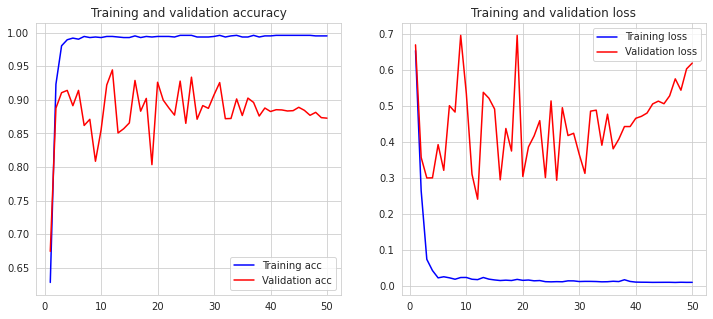

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))


[[5495  746]
 [  64   58]]
Recall   : 0.47540983606557374
Accuracy : 0.8727015558698727


AUC: 0.6779388549018783


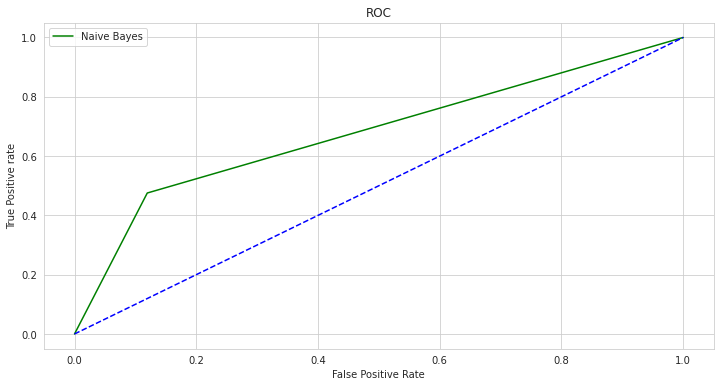

In [ ]:
plot_auc(y_test, y_pred)

In [ ]:
NN1 = model

## Symptom 2

In [ ]:
# Set indicator for symptoms except 2 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [ ]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

Visualiazation

Text(0.5, 1.0, 'The number of each symptom ')

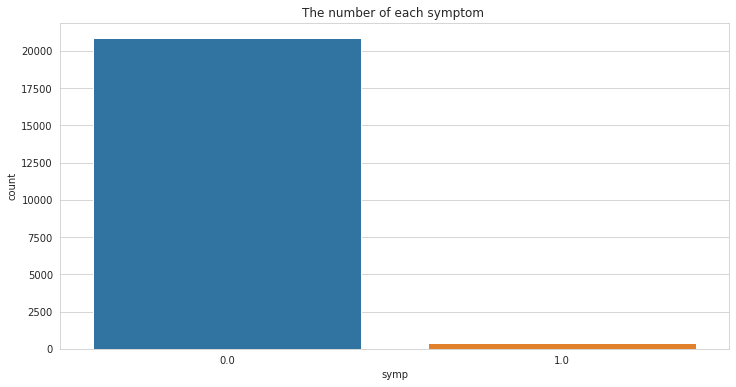

In [ ]:
sns.countplot(x="symp", data=df_trans)
plt.title('The number of each symptom ')

In [ ]:
# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)

Text(0.5, 1.0, 'The distribution of text length')

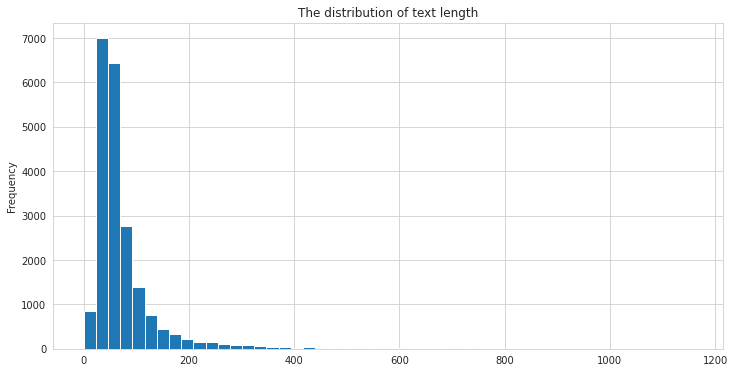

In [ ]:
#distribution of length
df_trans['length'].plot.hist(bins=50)
plt.title('The distribution of text length')

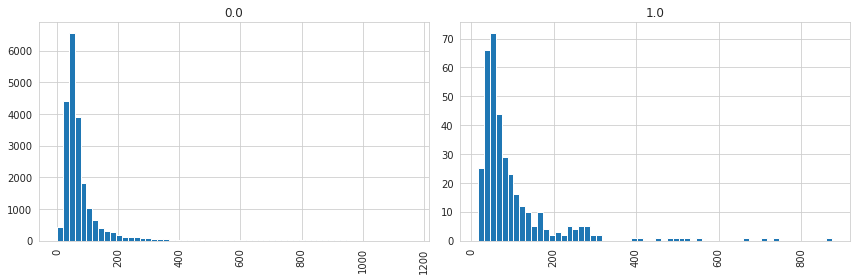

In [ ]:
# The distribution of text length of each symptom
df_trans.hist(column='length',by='symp',bins=60, figsize=(12,4))
plt.tight_layout()


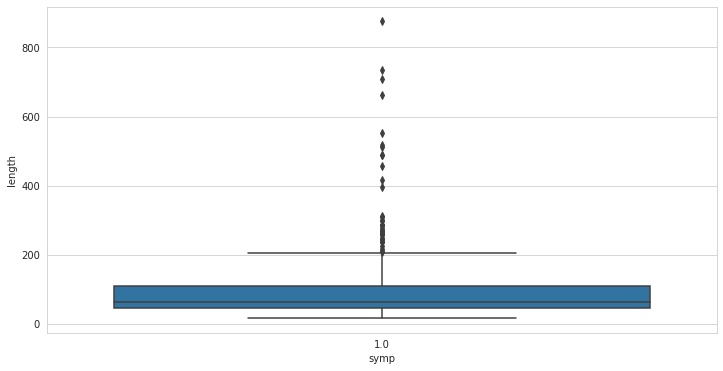

In [ ]:
# symp_one length distribution
sns.boxplot(x='symp',y='length',data=df_trans[df_trans['symp']== 1])

In [ ]:
X=df_trans[['Content']]
y=df_trans['symp'].astype(int)

Resample to fix imbalance

In [ ]:
# Split train-test data
cont_train, cont_test, dep_train, dep_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# summarize class distribution
print("Before oversampling: ", Counter(dep_train))

# balance data
under = RandomUnderSampler(sampling_strategy=0.4)
over = RandomOverSampler(sampling_strategy="minority")
steps = [('u',under), ('o',over)]
pipeline = Pipeline(steps=steps)
cont_train, dep_train = pipeline.fit_resample(cont_train, dep_train)

# summarize class distribution
print("After oversampling: ", Counter(dep_train))

Before oversampling:  Counter({0: 14592, 1: 255})
After oversampling:  Counter({0: 637, 1: 637})


In [ ]:
# Vectorize text 
vectorizer_sym2 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym2.fit_transform(cont_train[:,0])
cont_train_vec=vectorizer_sym2.transform(cont_train[:,0]).toarray()
cont_test_vec=vectorizer_sym2.transform(cont_test['Content']).toarray()

### Naive Bayes

In [ ]:
clf = GaussianNB()

clf.fit(cont_train_vec, dep_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[3902 2358]
 [  48   55]]
Recall   : 0.5339805825242718
Accuracy : 0.6218764733616219


AUC: 0.5786516331151711


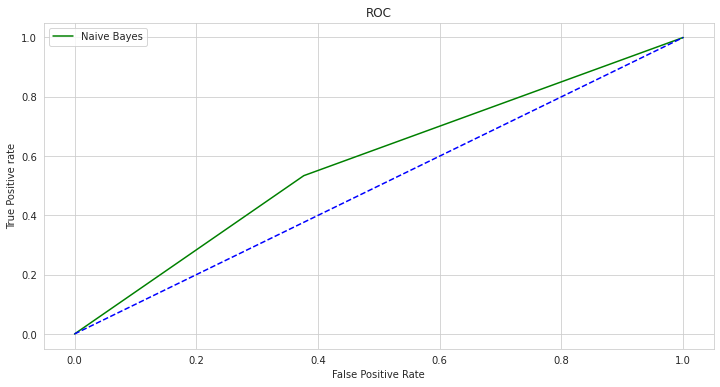

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
NBCLF2 = clf

### Random Forest

In [ ]:
#n_estimators = [300, 800, 1200]
#max_depth = [5, 15, 25, 30]
#min_samples_split = [5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10] 

#params = dict(n_estimators = n_estimators, max_depth = max_depth,  
              #min_samples_split = min_samples_split, 
             #min_samples_leaf = min_samples_leaf)

#clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(cont_train_vec, dep_train)

#print('Best Model:', clf.best_estimator_)
#print('Best score:', clf.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[5977  283]
 [  21   82]]
Recall   : 0.7961165048543689
Accuracy : 0.9522237938079522


AUC: 0.8754544185613697


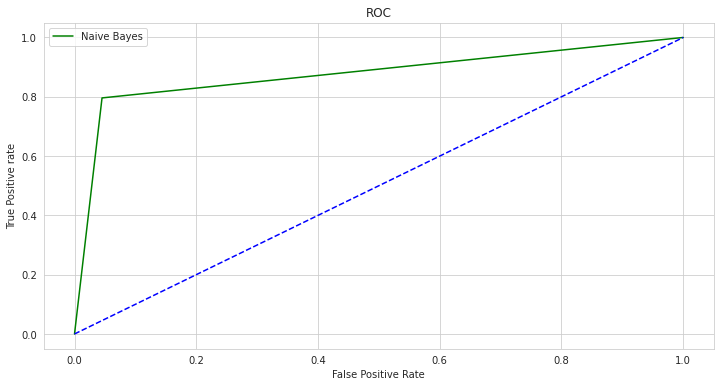

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
RFCLF2 = clf

### SVC

In [ ]:
#Cs = [0.001, 0.01, 0.1, 1, 10]
#gammas = [0.001, 0.01, 0.1, 1]

#params = dict(C = Cs, gamma = gammas)

#clf = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(cont_train_vec, dep_train)

#print('Best Model:', clf.best_estimator_)
#print('Best score:', clf.best_score_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[6095  165]
 [  49   54]]
Recall   : 0.5242718446601942
Accuracy : 0.9663680653779664


AUC: 0.7489570085920779


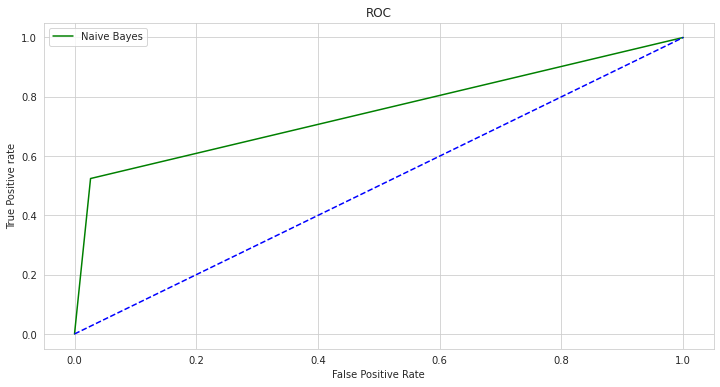

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
SVCCLF2 = clf

### Neural Network Model Keras

In [ ]:
sentences_train = cont_train[:,0]
sentences_test=cont_test['Content'] 
y_train = dep_train
y_test = dep_test

In [ ]:
tokenizer_sym2 = Tokenizer(num_words=5000)
tokenizer_sym2.fit_on_texts(sentences_train)

X_train = tokenizer_sym2.texts_to_sequences(sentences_train)
X_test = tokenizer_sym2.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym2.word_index) + 1  

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           122250    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 32)           4832      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               400250    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 527,583
Trainable params: 527,583
Non-trainable params: 0
________________________________________________

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=20)

Epoch 1/50
64/64 [==============================] - 3s 35ms/step - loss: 0.6865 - accuracy: 0.5623 - val_loss: 0.6446 - val_accuracy: 0.7217
Epoch 2/50
64/64 [==============================] - 1s 22ms/step - loss: 0.3504 - accuracy: 0.8961 - val_loss: 0.2762 - val_accuracy: 0.9305
Epoch 3/50
64/64 [==============================] - 2s 30ms/step - loss: 0.0865 - accuracy: 0.9846 - val_loss: 0.2664 - val_accuracy: 0.9290
Epoch 4/50
64/64 [==============================] - 1s 21ms/step - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.2017 - val_accuracy: 0.9464
Epoch 5/50
64/64 [==============================] - 2s 30ms/step - loss: 0.0247 - accuracy: 0.9934 - val_loss: 0.1406 - val_accuracy: 0.9662
Epoch 6/50
64/64 [==============================] - 1s 22ms/step - loss: 0.0456 - accuracy: 0.9838 - val_loss: 0.3277 - val_accuracy: 0.9140
Epoch 7/50
64/64 [==============================] - 1s 22ms/step - loss: 0.0156 - accuracy: 0.9945 - val_loss: 0.2853 - val_accuracy: 0.9266
Epoch 8/50
64

Training Accuracy: 0.9922
Testing Accuracy:  0.9181


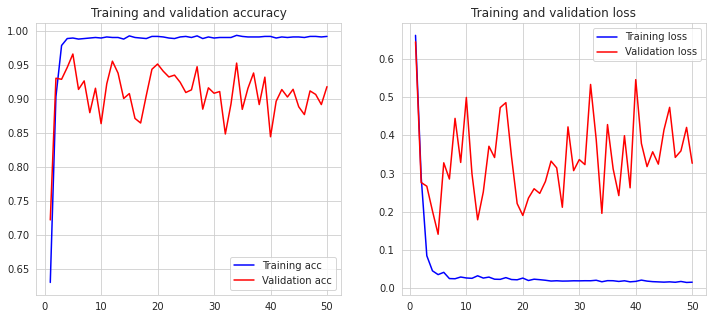

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

[[5802  458]
 [  63   40]]
Recall   : 0.3883495145631068
Accuracy : 0.9181203834669182


AUC: 0.6575932876329911


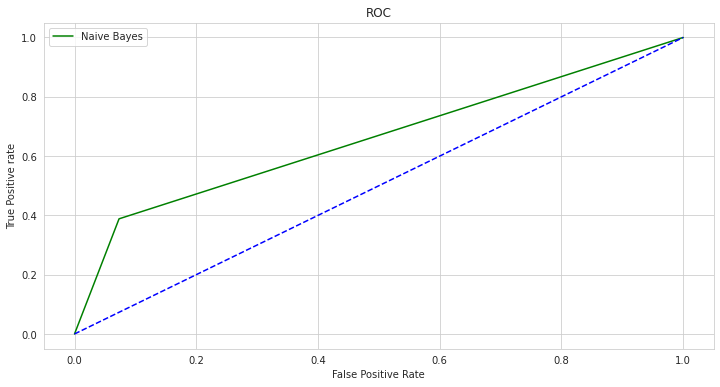

In [ ]:
plot_auc(y_test, y_pred)

In [ ]:
NN2 = model

## Symptom 3

In [ ]:
# Set indicator for symptoms except 3 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [ ]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

Visualiazation

Text(0.5, 1.0, 'The number of each symptom ')

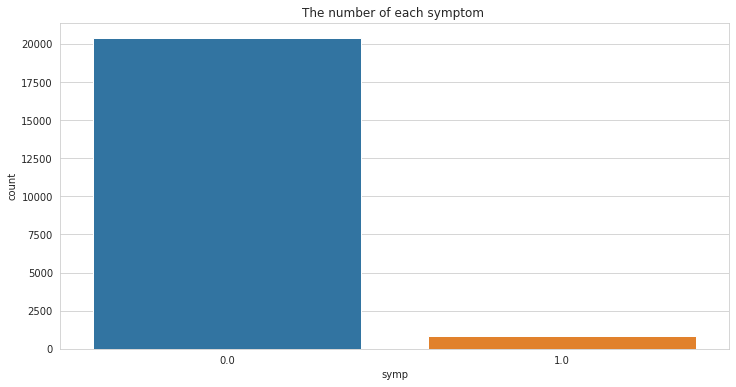

In [ ]:
sns.countplot(x="symp", data=df_trans)
plt.title('The number of each symptom ')

In [ ]:
# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)

Text(0.5, 1.0, 'The distribution of text length')

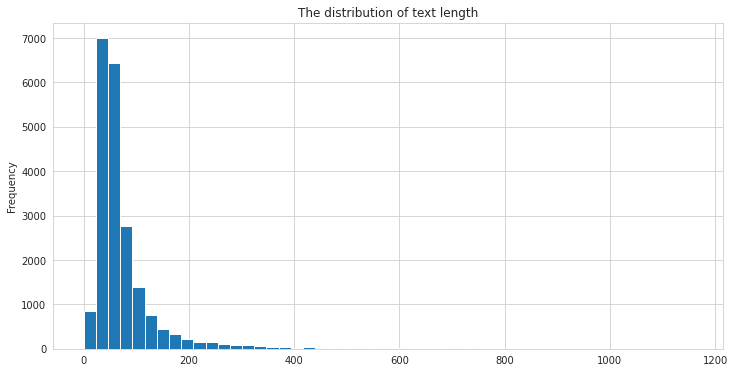

In [ ]:
#distribution of length
df_trans['length'].plot.hist(bins=50)
plt.title('The distribution of text length')

In [ ]:
df_trans['length'].describe()

count    21210.000000
mean        75.945167
std         77.797113
min          0.000000
25%         40.000000
50%         54.000000
75%         81.000000
max       1157.000000
Name: length, dtype: float64

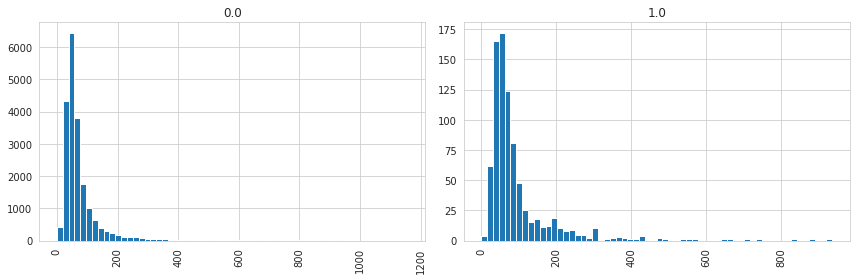

In [ ]:
# The distribution of text length of each symptom
df_trans.hist(column='length',by='symp',bins=60, figsize=(12,4))
plt.tight_layout()


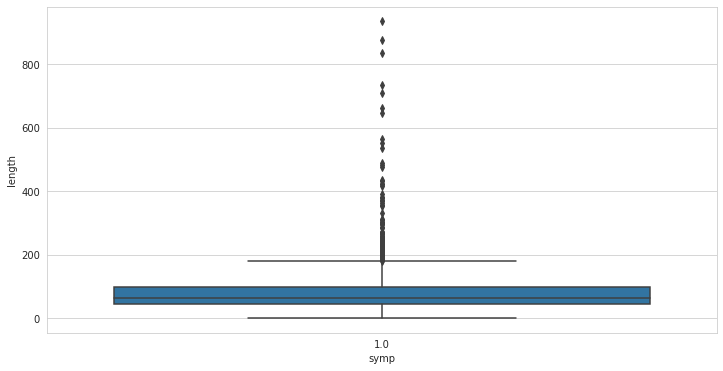

In [ ]:
# symp_one length distribution
sns.boxplot(x='symp',y='length',data=df_trans[df_trans['symp']== 1])

In [ ]:
X=df_trans[['Content']]
y=df_trans['symp'].astype(int)

Over sample to fix imbalance

In [ ]:
# Split train-test data
cont_train, cont_test, dep_train, dep_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# summarize class distribution
print("Before oversampling: ", Counter(dep_train))

# balance data
under = RandomUnderSampler(sampling_strategy=0.4)
over = RandomOverSampler(sampling_strategy="minority")
steps = [('u',under), ('o',over)]
pipeline = Pipeline(steps=steps)
cont_train, dep_train = pipeline.fit_resample(cont_train, dep_train)

# summarize class distribution
print("After oversampling: ", Counter(dep_train))

Before oversampling:  Counter({0: 14265, 1: 582})
After oversampling:  Counter({0: 1455, 1: 1455})


In [ ]:
# Vectorize text 
vectorizer_sym3 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym3.fit_transform(cont_train[:,0])
cont_train_vec=vectorizer_sym3.transform(cont_train[:,0]).toarray()
cont_test_vec=vectorizer_sym3.transform(cont_test['Content']).toarray()

### Naive Bayes

In [ ]:
clf = GaussianNB()

clf.fit(cont_train_vec, dep_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[2638 3475]
 [ 121  129]]
Recall   : 0.516
Accuracy : 0.43485777149143484


AUC: 0.47376967119254054


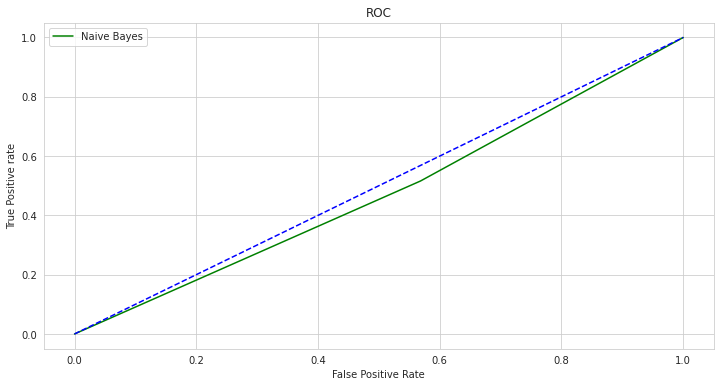

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
NBCLF3 = clf

### Random Forest

In [ ]:
# n_estimators = [300, 800, 1200]
# max_depth = [5, 15, 25, 30]
# min_samples_split = [5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# params = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(cont_train_vec, dep_train)

# print('Best Model:', clf.best_estimator_)
# print('Best score:', clf.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[5267  846]
 [ 172   78]]
Recall   : 0.312
Accuracy : 0.8400125726858401


AUC: 0.5868032062816948


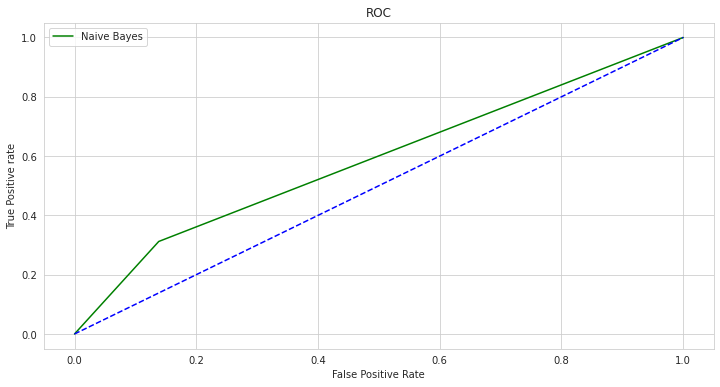

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
RFCLF3 = clf

### SVC

In [ ]:
# Cs = [0.001, 0.01, 0.1, 1, 10]
# gammas = [0.001, 0.01, 0.1, 1]

# params = dict(C = Cs, gamma = gammas)

# clf = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(cont_train_vec, dep_train)

# print('Best Model:', clf.best_estimator_)
# print('Best score:', clf.best_score_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[5455  658]
 [ 206   44]]
Recall   : 0.176
Accuracy : 0.8642149929278642


AUC: 0.5341802715524292


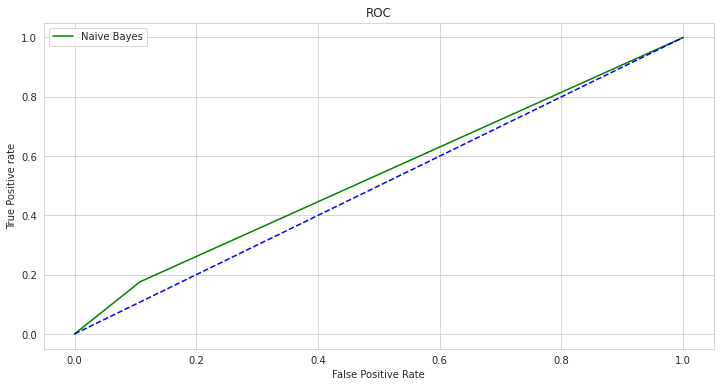

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
SVCCLF3 = clf

### Neural Network Model Keras

In [ ]:
sentences_train = cont_train[:,0]
sentences_test=cont_test['Content'] 
y_train = dep_train
y_test = dep_test

In [ ]:
tokenizer_sym3 = Tokenizer(num_words=5000)
tokenizer_sym3.fit_on_texts(sentences_train)

X_train = tokenizer_sym3.texts_to_sequences(sentences_train)
X_test = tokenizer_sym3.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym3.word_index) + 1  

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           197650    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 32)           4832      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               400250    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 602,983
Trainable params: 602,983
Non-trainable params: 0
________________________________________________

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=20)

Epoch 1/50
146/146 [==============================] - 3s 16ms/step - loss: 0.6810 - accuracy: 0.5578 - val_loss: 0.4306 - val_accuracy: 0.8892
Epoch 2/50
146/146 [==============================] - 2s 14ms/step - loss: 0.3532 - accuracy: 0.8592 - val_loss: 0.5287 - val_accuracy: 0.7940
Epoch 3/50
146/146 [==============================] - 2s 14ms/step - loss: 0.1290 - accuracy: 0.9627 - val_loss: 0.4192 - val_accuracy: 0.8537
Epoch 4/50
146/146 [==============================] - 2s 15ms/step - loss: 0.0966 - accuracy: 0.9744 - val_loss: 0.6572 - val_accuracy: 0.7443
Epoch 5/50
146/146 [==============================] - 2s 14ms/step - loss: 0.0938 - accuracy: 0.9655 - val_loss: 0.6018 - val_accuracy: 0.7731
Epoch 6/50
146/146 [==============================] - 3s 18ms/step - loss: 0.0708 - accuracy: 0.9755 - val_loss: 0.4415 - val_accuracy: 0.8529
Epoch 7/50
146/146 [==============================] - 2s 14ms/step - loss: 0.0732 - accuracy: 0.9703 - val_loss: 0.8043 - val_accuracy: 0.6895

Training Accuracy: 0.9818
Testing Accuracy:  0.7638


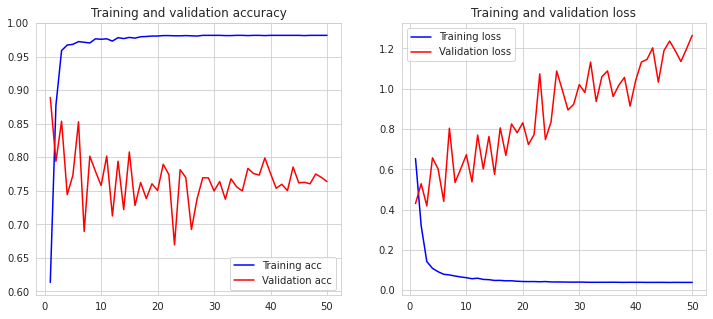

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))


[[4795 1318]
 [ 185   65]]
Recall   : 0.26
Accuracy : 0.7637906647807637


AUC: 0.522196957304106


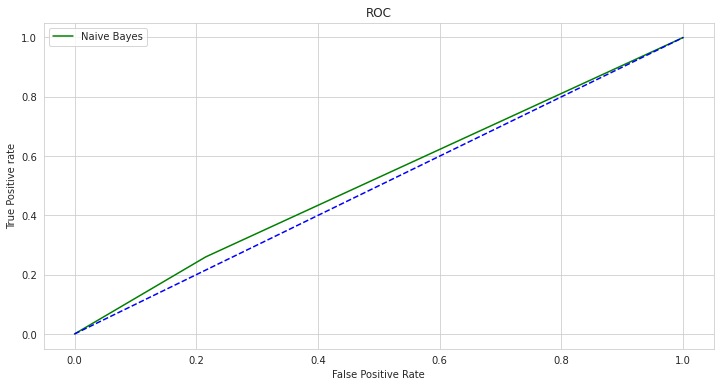

In [ ]:
plot_auc(y_test, y_pred)

In [ ]:
NN3 = model

## Symptom 4

In [ ]:
# Set indicator for symptoms except 4 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})


df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [ ]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

Visualiazation

Text(0.5, 1.0, 'The number of each symptom ')

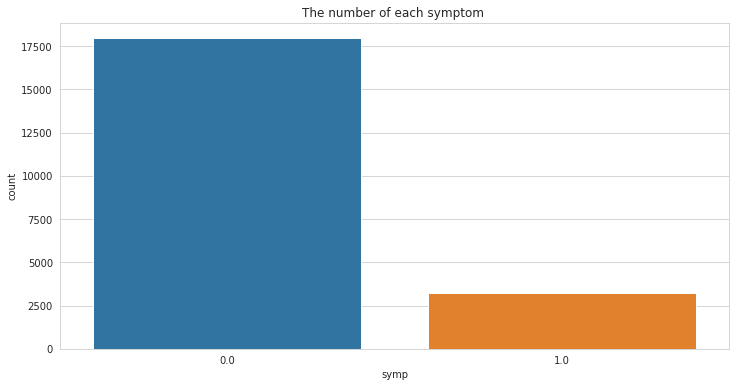

In [ ]:
sns.countplot(x="symp", data=df_trans)
plt.title('The number of each symptom ')

In [ ]:
# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)

Text(0.5, 1.0, 'The distribution of text length')

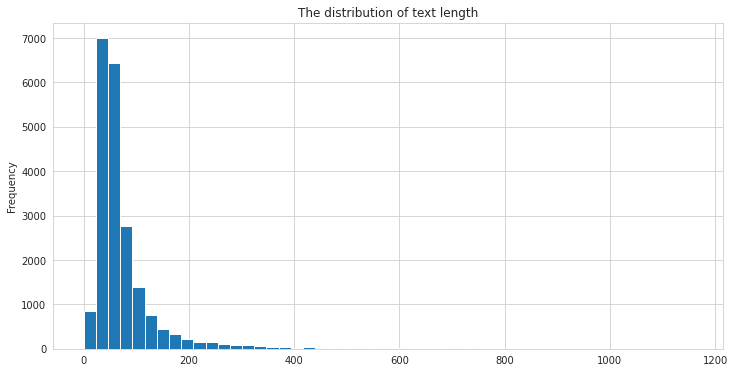

In [ ]:
#distribution of length
df_trans['length'].plot.hist(bins=50)
plt.title('The distribution of text length')

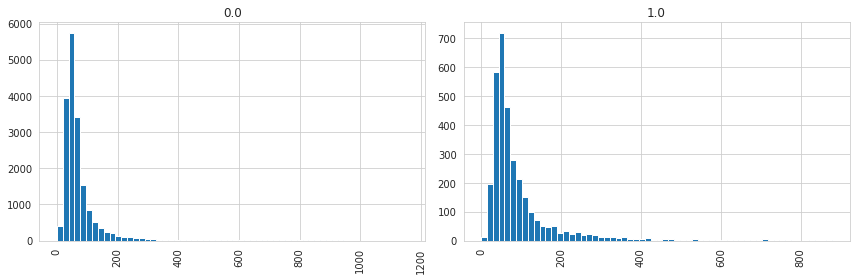

In [ ]:
# The distribution of text length of each symptom
df_trans.hist(column='length',by='symp',bins=60, figsize=(12,4))
plt.tight_layout()


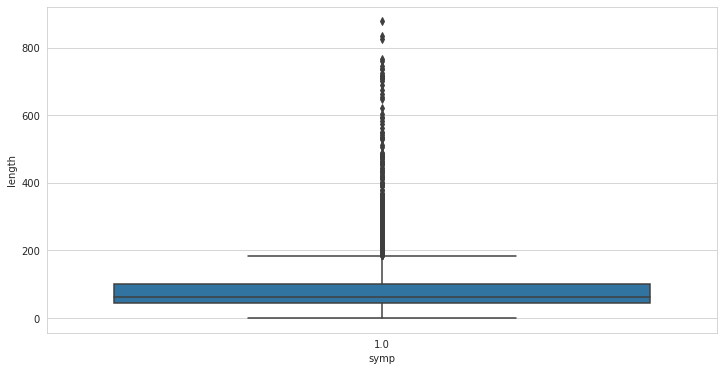

In [ ]:
# symp_one length distribution
sns.boxplot(x='symp',y='length',data=df_trans[df_trans['symp']== 1])

In [ ]:
X=df_trans[['Content']]
y=df_trans['symp'].astype(int)

Over sample to fix imbalance

In [ ]:
# Split train-test data
cont_train, cont_test, dep_train, dep_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# summarize class distribution
print("Before oversampling: ", Counter(dep_train))

# balance data
under = RandomUnderSampler(sampling_strategy=0.4)
over = RandomOverSampler(sampling_strategy="minority")
steps = [('u',under), ('o',over)]
pipeline = Pipeline(steps=steps)
cont_train, dep_train = pipeline.fit_resample(cont_train, dep_train)

# summarize class distribution
print("After oversampling: ", Counter(dep_train))

Before oversampling:  Counter({0: 12573, 1: 2274})
After oversampling:  Counter({0: 5685, 1: 5685})


In [ ]:
# Vectorize text 
vectorizer_sym4 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym4.fit_transform(cont_train[:,0])
cont_train_vec=vectorizer_sym4.transform(cont_train[:,0]).toarray()
cont_test_vec=vectorizer_sym4.transform(cont_test['Content']).toarray()

### Naive Bayes

In [ ]:
clf = GaussianNB()

clf.fit(cont_train_vec, dep_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[1479 3917]
 [ 289  678]]
Recall   : 0.7011375387797312
Accuracy : 0.338991041961339


AUC: 0.487614729360214


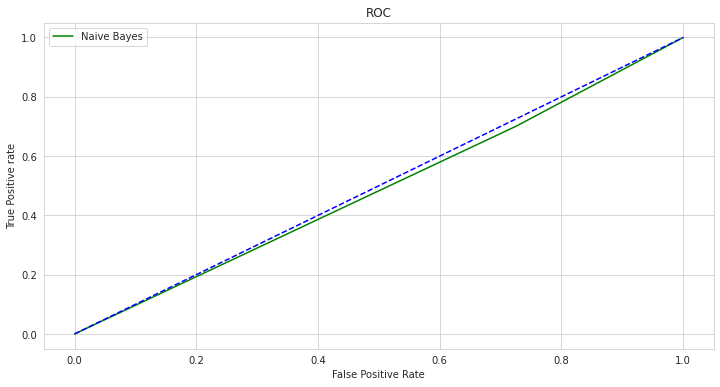

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
NBCLF4 = clf

### Random Forest

In [ ]:
# n_estimators = [300, 800, 1200]
# max_depth = [5, 15, 25, 30, 50]
# min_samples_split = [5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# params = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(cont_train_vec, dep_train)

# print('Best Model:', clf.best_estimator_)
# print('Best score:', clf.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[4273 1123]
 [ 566  401]]
Recall   : 0.41468459152016546
Accuracy : 0.7345591702027345


AUC: 0.6032837338623808


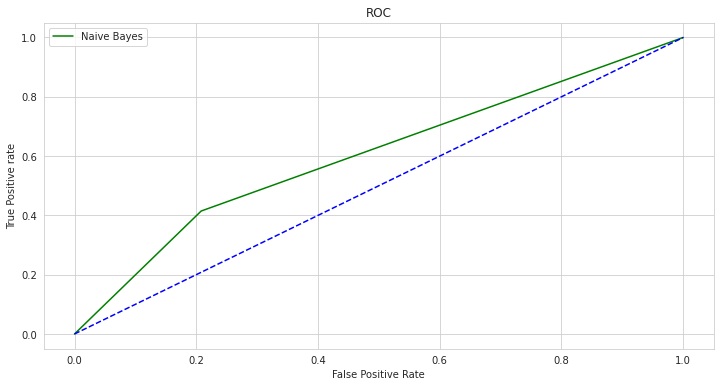

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
RFCLF4 = clf

### SVC

In [ ]:
# Cs = [0.001, 0.01, 0.1, 1, 10]
# gammas = [0.001, 0.01, 0.1, 1]

# params = dict(C = Cs, gamma = gammas)

# clf = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(cont_train_vec, dep_train)

# print('Best Model:', clf.best_estimator_)
# print('Best score:', clf.best_score_)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


In [ ]:
plot_auc(dep_test, preds)

In [ ]:
SVCCLF4 = clf

### Neural Network Model Keras

In [ ]:
sentences_train = cont_train[:,0]
sentences_test=cont_test['Content'] 
y_train = dep_train
y_test = dep_test

In [ ]:
tokenizer_sym4 = Tokenizer(num_words=5000)
tokenizer_sym4.fit_on_texts(sentences_train)

X_train = tokenizer_sym4.texts_to_sequences(sentences_train)
X_test = tokenizer_sym4.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym4.word_index) + 1  

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=20)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)
print('Recall   :', metrics.recall_score(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

In [ ]:
plot_auc(y_test, y_pred)

In [ ]:
NN4 = model

## Symptom 5

In [ ]:
# Set indicator for symptoms except 5 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [ ]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

Visualiazation

Text(0.5, 1.0, 'The number of each symptom ')

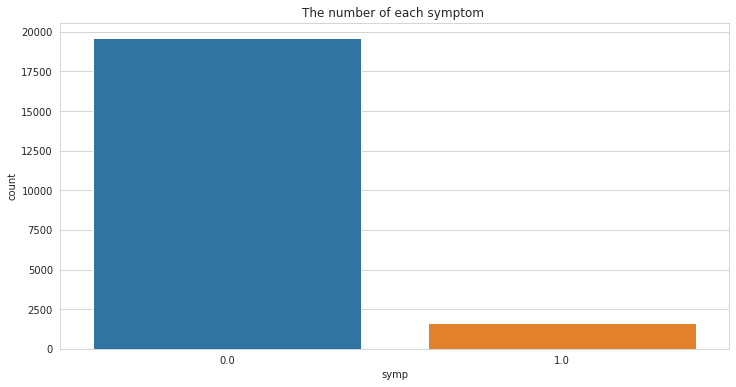

In [ ]:
sns.countplot(x="symp", data=df_trans)
plt.title('The number of each symptom ')

In [ ]:
# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)

Text(0.5, 1.0, 'The distribution of text length')

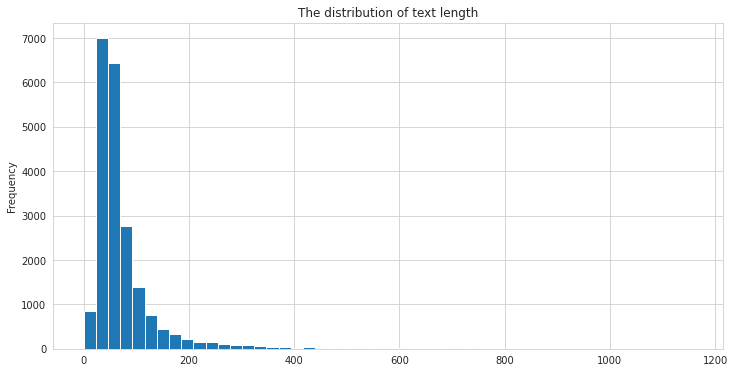

In [ ]:
#distribution of length
df_trans['length'].plot.hist(bins=50)
plt.title('The distribution of text length')

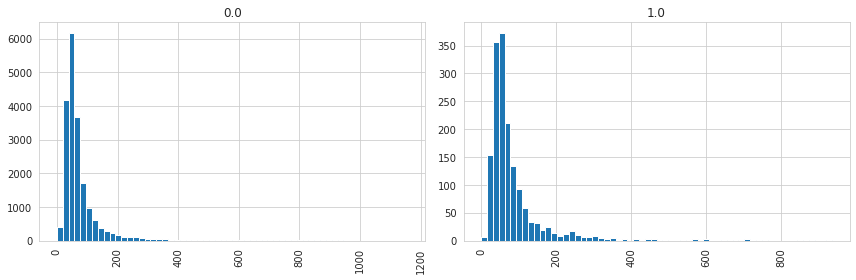

In [ ]:
# The distribution of text length of each symptom
df_trans.hist(column='length',by='symp',bins=60, figsize=(12,4))
plt.tight_layout()


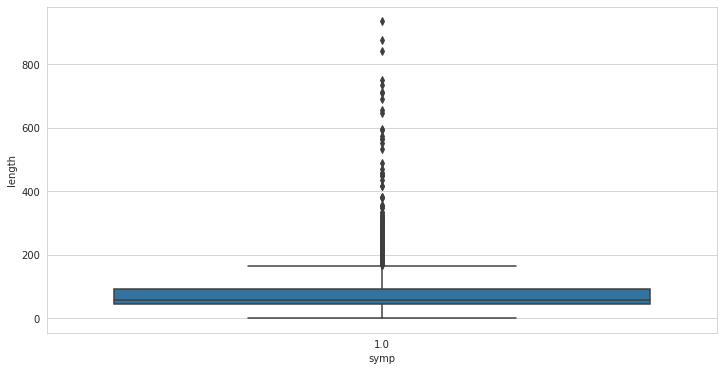

In [ ]:
# symp_one length distribution
sns.boxplot(x='symp',y='length',data=df_trans[df_trans['symp']== 1])

In [ ]:
X=df_trans[['Content']]
y=df_trans['symp'].astype(int)

Over sample to fix imbalance

In [ ]:
# Split train-test data
cont_train, cont_test, dep_train, dep_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# summarize class distribution
print("Before oversampling: ", Counter(dep_train))

# balance data
under = RandomUnderSampler(sampling_strategy=0.4)
over = RandomOverSampler(sampling_strategy="minority")
steps = [('u',under), ('o',over)]
pipeline = Pipeline(steps=steps)
cont_train, dep_train = pipeline.fit_resample(cont_train, dep_train)

# summarize class distribution
print("After oversampling: ", Counter(dep_train))

Before oversampling:  Counter({0: 13725, 1: 1122})
After oversampling:  Counter({0: 2805, 1: 2805})


In [ ]:
# Vectorize text 
vectorizer_sym5 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym5.fit_transform(cont_train[:,0])
cont_train_vec=vectorizer_sym5.transform(cont_train[:,0]).toarray()
cont_test_vec=vectorizer_sym5.transform(cont_test['Content']).toarray()

### Naive Bayes

In [ ]:
clf = GaussianNB()

clf.fit(cont_train_vec, dep_train)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


In [ ]:
plot_auc(dep_test, preds)

In [ ]:
NBCLF5 = clf

### Random Forest

In [ ]:
# n_estimators = [300, 800, 1200]
# max_depth = [5, 15, 25, 30]
# min_samples_split = [5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# params = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(cont_train_vec, dep_train)

# print('Best Model:', clf.best_estimator_)
# print('Best score:', clf.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[4979  894]
 [ 342  148]]
Recall   : 0.3020408163265306
Accuracy : 0.8057520037718058


AUC: 0.5749093916470045


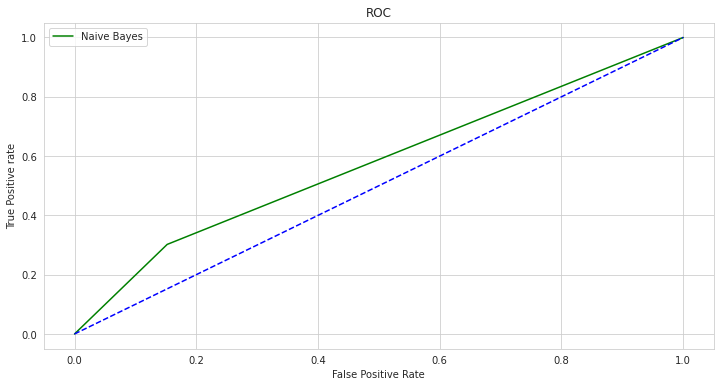

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
RFCLF5 = clf

### SVC

In [ ]:
# Cs = [0.001, 0.01, 0.1, 1, 10]
# gammas = [0.001, 0.01, 0.1, 1]

# params = dict(C = Cs, gamma = gammas)

# clf = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 

clf.fit(cont_train_vec, dep_train)

# print('Best Model:', clf.best_estimator_)
# print('Best score:', clf.best_score_)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


In [ ]:
plot_auc(dep_test, preds)

In [ ]:
SVCCLF5 = clf

### Neural Network Model Keras

In [ ]:
sentences_train = cont_train[:,0]
sentences_test=cont_test['Content'] 
y_train = dep_train
y_test = dep_test

In [ ]:
tokenizer_sym5 = Tokenizer(num_words=5000)
tokenizer_sym5.fit_on_texts(sentences_train)

X_train = tokenizer_sym5.texts_to_sequences(sentences_train)
X_test = tokenizer_sym5.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym5.word_index) + 1  

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=20)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)
print('Recall   :', metrics.recall_score(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

In [ ]:
plot_auc(y_test, y_pred)

In [ ]:
NN5 = model

## Symptom 6

In [ ]:
# Set indicator for symptoms except 6 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [ ]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

Visualiazation

Text(0.5, 1.0, 'The number of each symptom ')

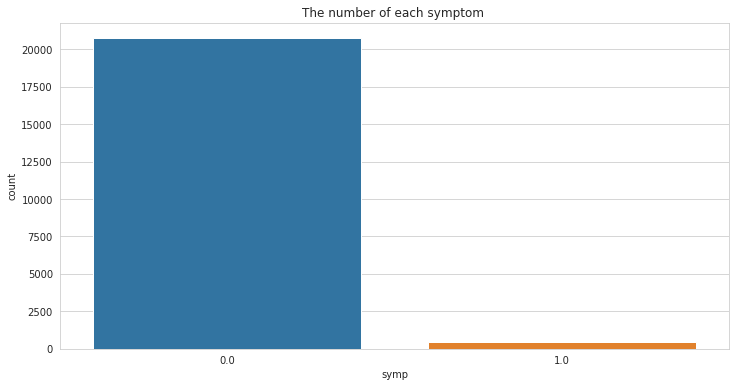

In [ ]:
sns.countplot(x="symp", data=df_trans)
plt.title('The number of each symptom ')

In [ ]:
# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)

Text(0.5, 1.0, 'The distribution of text length')

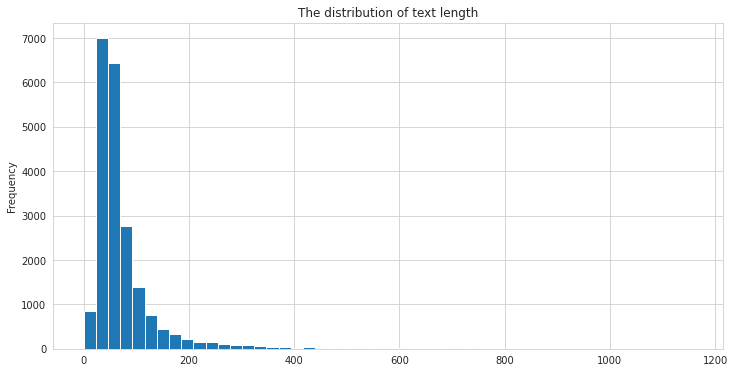

In [ ]:
#distribution of length
df_trans['length'].plot.hist(bins=50)
plt.title('The distribution of text length')

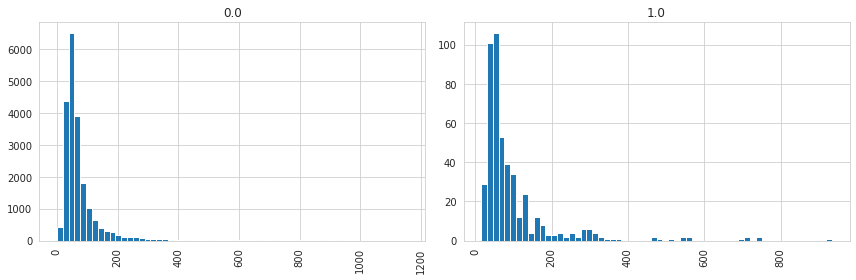

In [ ]:
# The distribution of text length of each symptom
df_trans.hist(column='length',by='symp',bins=60, figsize=(12,4))
plt.tight_layout()


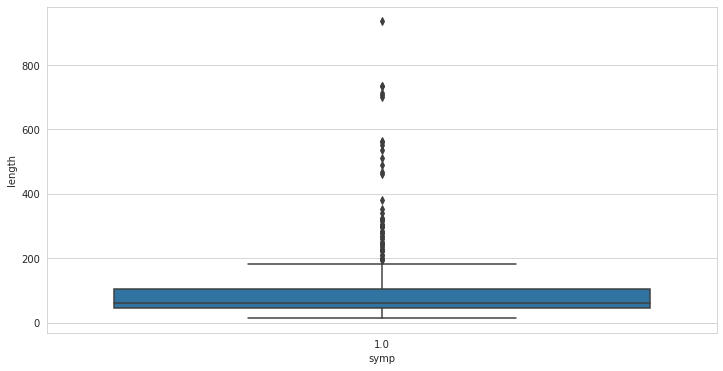

In [ ]:
# symp_one length distribution
sns.boxplot(x='symp',y='length',data=df_trans[df_trans['symp']== 1])

In [ ]:
X=df_trans[['Content']]
y=df_trans['symp'].astype(int)

Over sample to fix imbalance

In [ ]:
# Split train-test data
cont_train, cont_test, dep_train, dep_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# summarize class distribution
print("Before oversampling: ", Counter(dep_train))

# balance data
under = RandomUnderSampler(sampling_strategy=0.4)
over = RandomOverSampler(sampling_strategy="minority")
steps = [('u',under), ('o',over)]
pipeline = Pipeline(steps=steps)
cont_train, dep_train = pipeline.fit_resample(cont_train, dep_train)

# summarize class distribution
print("After oversampling: ", Counter(dep_train))

Before oversampling:  Counter({0: 14524, 1: 323})
After oversampling:  Counter({0: 807, 1: 807})


In [ ]:
# Vectorize text 
vectorizer_sym6 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym6.fit_transform(cont_train[:,0])
cont_train_vec=vectorizer_sym6.transform(cont_train[:,0]).toarray()
cont_test_vec=vectorizer_sym6.transform(cont_test['Content']).toarray()

### Naive Bayes

In [ ]:
clf = GaussianNB()

clf.fit(cont_train_vec, dep_train)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


In [ ]:
plot_auc(dep_test, preds)

In [ ]:
NBCLF6 = clf

### Random Forest

In [ ]:
# n_estimators = [300, 800, 1200]
# max_depth = [5, 15, 25, 30]
# min_samples_split = [5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# params = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(cont_train_vec, dep_train)

# print('Best Model:', clf.best_estimator_)
# print('Best score:', clf.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[5640  571]
 [ 111   41]]
Recall   : 0.26973684210526316
Accuracy : 0.8928178532138928


AUC: 0.5889015880144735


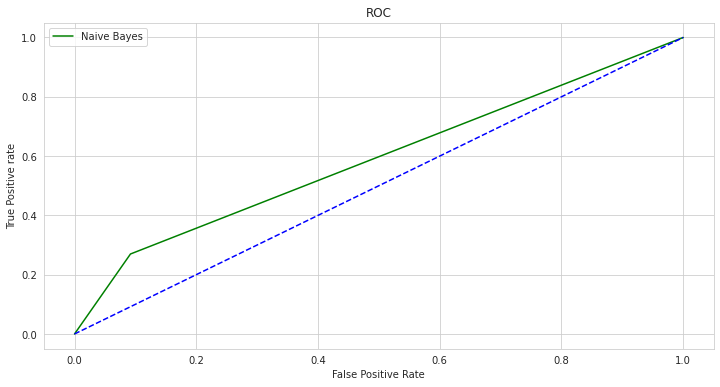

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
RFCLF6 = clf

### SVC

In [ ]:
# Cs = [0.001, 0.01, 0.1, 1, 10]
# gammas = [0.001, 0.01, 0.1, 1]

# params = dict(C = Cs, gamma = gammas)

# clf = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(cont_train_vec, dep_train)

# print('Best Model:', clf.best_estimator_)
# print('Best score:', clf.best_score_)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


In [ ]:
plot_auc(dep_test, preds)

In [ ]:
SVCCLF6 = clf

### Neural Network Model Keras

In [ ]:
sentences_train = cont_train[:,0]
sentences_test=cont_test['Content'] 
y_train = dep_train
y_test = dep_test

In [ ]:
tokenizer_sym6 = Tokenizer(num_words=5000)
tokenizer_sym6.fit_on_texts(sentences_train)

X_train = tokenizer_sym6.texts_to_sequences(sentences_train)
X_test = tokenizer_sym6.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym6.word_index) + 1  

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=20)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)
print('Recall   :', metrics.recall_score(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))


In [ ]:
plot_auc(y_test, y_pred)

In [ ]:
NN6 = model

## Symptom 7

In [ ]:
# Set indicator for symptoms except 7 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [ ]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

Visualiazation

Text(0.5, 1.0, 'The number of each symptom ')

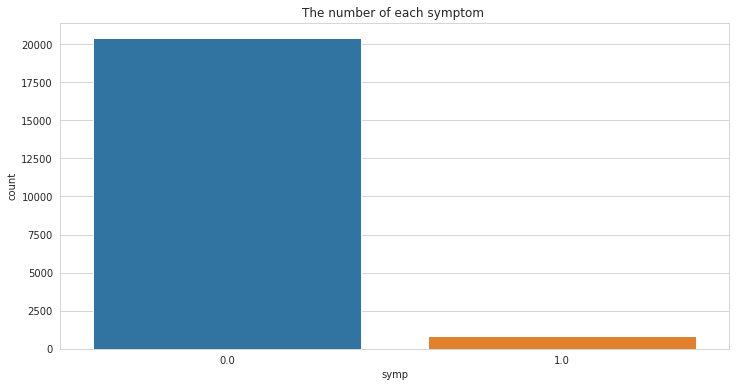

In [ ]:
sns.countplot(x="symp", data=df_trans)
plt.title('The number of each symptom ')

In [ ]:
# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)

Text(0.5, 1.0, 'The distribution of text length')

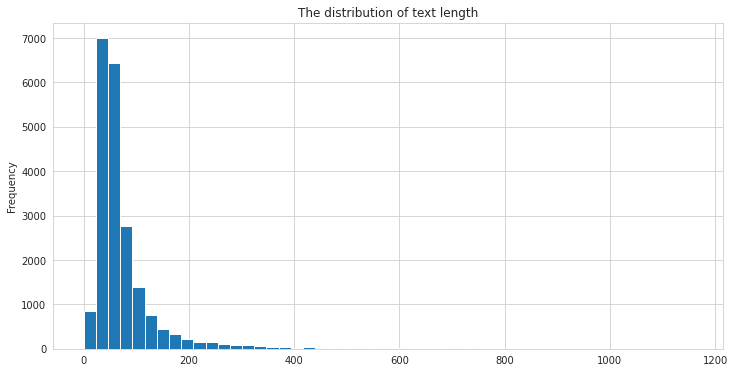

In [ ]:
#distribution of length
df_trans['length'].plot.hist(bins=50)
plt.title('The distribution of text length')

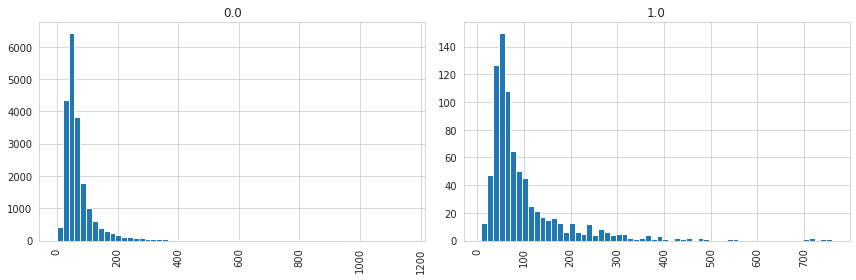

In [ ]:
# The distribution of text length of each symptom
df_trans.hist(column='length',by='symp',bins=60, figsize=(12,4))
plt.tight_layout()


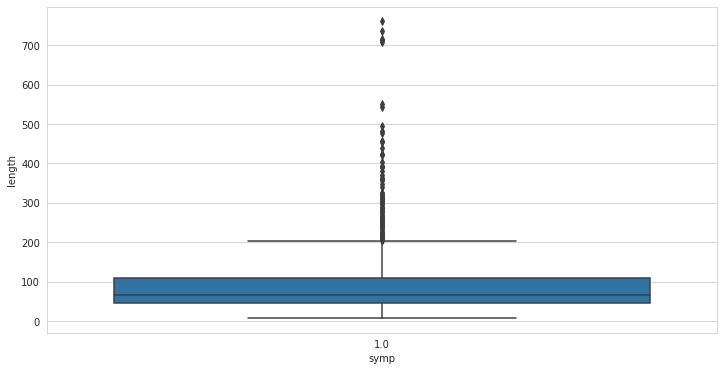

In [ ]:
# symp_one length distribution
sns.boxplot(x='symp',y='length',data=df_trans[df_trans['symp']== 1])

In [ ]:
X=df_trans[['Content']]
y=df_trans['symp'].astype(int)

Resample to fix imbalance

In [ ]:
# Split train-test data
cont_train, cont_test, dep_train, dep_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# summarize class distribution
print("Before oversampling: ", Counter(dep_train))

# balance data
under = RandomUnderSampler(sampling_strategy=0.4)
over = RandomOverSampler(sampling_strategy="minority")
steps = [('u',under), ('o',over)]
pipeline = Pipeline(steps=steps)
cont_train, dep_train = pipeline.fit_resample(cont_train, dep_train)

# summarize class distribution
print("After oversampling: ", Counter(dep_train))

Before oversampling:  Counter({0: 14293, 1: 554})
After oversampling:  Counter({0: 1385, 1: 1385})


In [ ]:
# Vectorize text 
vectorizer_sym7 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym7.fit_transform(cont_train[:,0])
cont_train_vec=vectorizer_sym7.transform(cont_train[:,0]).toarray()
cont_test_vec=vectorizer_sym7.transform(cont_test['Content']).toarray()

### Naive Bayes

In [ ]:
clf = GaussianNB()

clf.fit(cont_train_vec, dep_train)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


In [ ]:
plot_auc(dep_test, preds)

In [ ]:
NBCLF7 = clf

### Random Forest

In [ ]:
# n_estimators = [300, 800, 1200]
# max_depth = [5, 15, 25, 30]
# min_samples_split = [5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# params = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(cont_train_vec, dep_train)

# print('Best Model:', clf.best_estimator_)
# print('Best score:', clf.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


[[5495  607]
 [ 116  145]]
Recall   : 0.5555555555555556
Accuracy : 0.8863743517208864


AUC: 0.7280399868895444


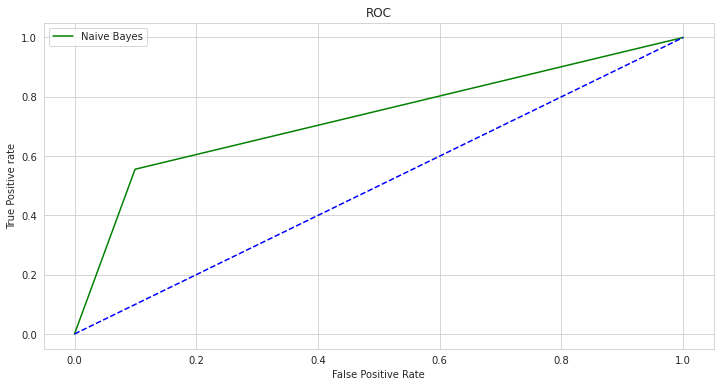

In [ ]:
plot_auc(dep_test, preds)

In [ ]:
RFCLF7 = clf

### SVC

In [ ]:
# Cs = [0.001, 0.01, 0.1, 1, 10]
# gammas = [0.001, 0.01, 0.1, 1]

# params = dict(C = Cs, gamma = gammas)

# clf = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=params, n_jobs=3, cv=3, verbose=1, scoring='recall')

clf = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

clf.fit(cont_train_vec, dep_train)

# print('Best Model:', clf.best_estimator_)
# print('Best score:', clf.best_score_)

In [ ]:
preds = clf.predict(cont_test_vec)

In [ ]:
confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))


In [ ]:
plot_auc(dep_test, preds)

In [ ]:
SVCCLF7 = clf

### Neural Network Model Keras

In [ ]:
sentences_train = cont_train[:,0]
sentences_test=cont_test['Content'] 
y_train = dep_train
y_test = dep_test

In [ ]:
tokenizer_sym7 = Tokenizer(num_words=5000)
tokenizer_sym7.fit_on_texts(sentences_train)

X_train = tokenizer_sym7.texts_to_sequences(sentences_train)
X_test = tokenizer_sym7.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym7.word_index) + 1  

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=20)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))


In [ ]:
plot_auc(y_test, y_pred)

In [ ]:
NN7 = model

## Assemble the 7 models as the final predictor for depression

### Transform test set

For each data entry, parse into each of the 7 symptom models; if >=4 out of 7 models return 1, label it as depression, otherwise, label as not depression

In [ ]:
df_test

,ID,AuthorID,Author,Date,Content,Words,symp_one,symp_two,symp_three,symp_four,symp_five,symp_six,symp_seven,None
12,13,3.030000e+17,Emma/Blue#2035,43630.88194,it‚äôs like take knife try stab cut nerve arm,17,0,0,0,0.0,0,0,0.0,1.0
15,16,4.840000e+17,Lucid_Thoughts#2342,43631.01458,minute ago thing feel like sharp pain,17,0,0,0,0.0,0,0,1.0,0.0
22,23,4.120000e+17,~‚òÖ~#0666,43631.43889,abusive family difficult violent help tell help,32,0,0,0,1.0,1,0,0.0,0.0
27,28,3.660000e+17,BasicCouple#7323,43631.45903,severely injure broken bone burn stab wound li...,63,0,0,0,1.0,0,1,1.0,0.0
32,33,3.030000e+17,Emma/Blue#2035,43631.625,don‚äôt reason say i‚äôm burden way help,28,0,0,1,1.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23959,23965,3.460000e+17,gogy~#2680,44070.52986,wanna kill literally push limit man not shit a...,15,0,0,0,0.0,0,0,1.0,0.0
23961,23967,2.290000e+17,alex.#5092,44070.75764,need bit help decision choice simple be give r...,27,0,0,0,0.0,0,0,0.0,1.0
23962,23968,5.320000e+17,BrielleBunnyüíç#8328,44070.90139,bad day try hard happy,16,0,0,0,0.0,0,0,0.0,1.0
23974,23980,3.210000e+17,cocosiz#2140,44071.11667,usually smoke weed amplify feel make anxious,19,0,0,0,1.0,0,0,0.0,0.0


In [ ]:
# add column to identify number of symptoms
df_test['num_symptoms'] = [0]*len(df_test)

for i in range(0,len(df_test)):
  df_test['num_symptoms'].iloc[i] = df_test['symp_one'].iloc[i] + df_test['symp_two'].iloc[i] + df_test['symp_three'].iloc[i] + df_test['symp_four'].iloc[i] + df_test['symp_five'].iloc[i] + df_test['symp_six'].iloc[i] + df_test['symp_seven'].iloc[i]

### Test different thresholds 1-7

In [ ]:
# add target column
y_valid1 = [1 if x >= 1 else 0 for x in df_test['num_symptoms']]
y_valid2 = [1 if x >= 2 else 0 for x in df_test['num_symptoms']]
y_valid3 = [1 if x >= 3 else 0 for x in df_test['num_symptoms']]
y_valid4 = [1 if x >= 4 else 0 for x in df_test['num_symptoms']]
y_valid5 = [1 if x >= 5 else 0 for x in df_test['num_symptoms']]
y_valid6 = [1 if x >= 6 else 0 for x in df_test['num_symptoms']]

In [ ]:
X_valid = df_test['Content']

### Assemble the models

In [ ]:
def final_predictor1(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 1 else 0 for x in temp_preds]
  return preds

In [ ]:
def final_predictor2(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 2 else 0 for x in temp_preds]
  return preds

In [ ]:
def final_predictor3(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 3 else 0 for x in temp_preds]
  return preds

In [ ]:
def final_predictor4(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 4 else 0 for x in temp_preds]
  return preds

In [ ]:
def final_predictor5(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 5 else 0 for x in temp_preds]
  return preds

In [ ]:
def final_predictor6(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 6 else 0 for x in temp_preds]
  return preds

In [ ]:
def eval(y_valid, y_preds):
  confusionMatrix = confusion_matrix(y_valid, y_preds)
  print(confusionMatrix)
  print('Precision:', metrics.precision_score(y_valid, y_preds, pos_label=1))
  print('Recall   :', metrics.recall_score(y_valid, y_preds, pos_label=1))
  print('Accuracy :', metrics.accuracy_score(y_valid, y_preds))
  print('F1 score :', metrics.f1_score(y_valid, y_preds, pos_label=1))
  plot_auc(y_valid, y_preds)

In [ ]:
y_preds1 = final_predictor1(X_valid)
y_preds2 = final_predictor2(X_valid)
y_preds3 = final_predictor3(X_valid)
y_preds4 = final_predictor4(X_valid)
y_preds5 = final_predictor5(X_valid)
y_preds6 = final_predictor6(X_valid)

[[2045 1359]
 [ 422  970]]
Precision: 0.41648776298840706
Recall   : 0.6968390804597702
Accuracy : 0.6286488740617181
F1 score : 0.5213652244020424
AUC: 0.6488014438726583


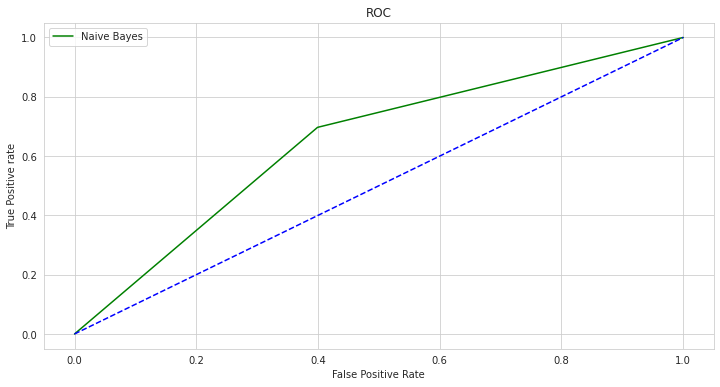

In [ ]:
eval(y_valid1, y_preds1)

[[3650  766]
 [ 206  174]]
Precision: 0.1851063829787234
Recall   : 0.45789473684210524
Accuracy : 0.7973311092577148
F1 score : 0.2636363636363636
AUC: 0.6422172959572845


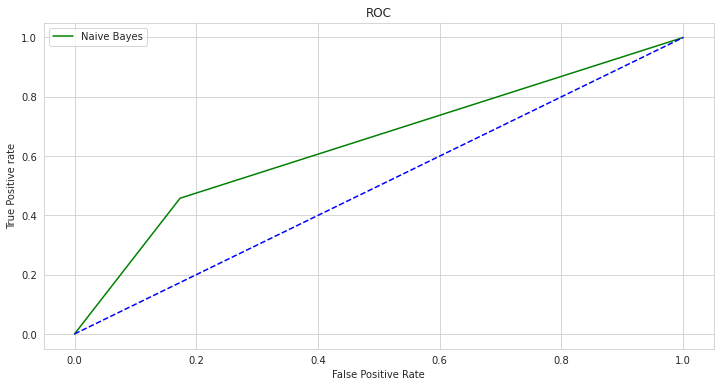

In [ ]:
eval(y_valid2, y_preds2)

[[4409  293]
 [  55   39]]
Precision: 0.11746987951807229
Recall   : 0.4148936170212766
Accuracy : 0.9274395329441201
F1 score : 0.18309859154929578
AUC: 0.6762898540231861


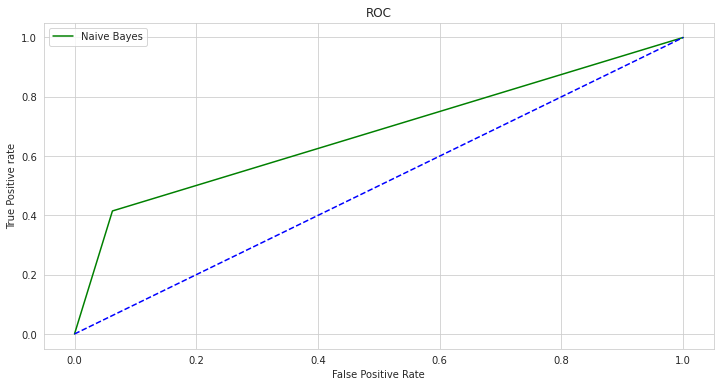

In [ ]:
eval(y_valid3, y_preds3)

[[4666  104]
 [  18    8]]
Precision: 0.07142857142857142
Recall   : 0.3076923076923077
Accuracy : 0.9745621351125938
F1 score : 0.11594202898550726
AUC: 0.6429446863409128


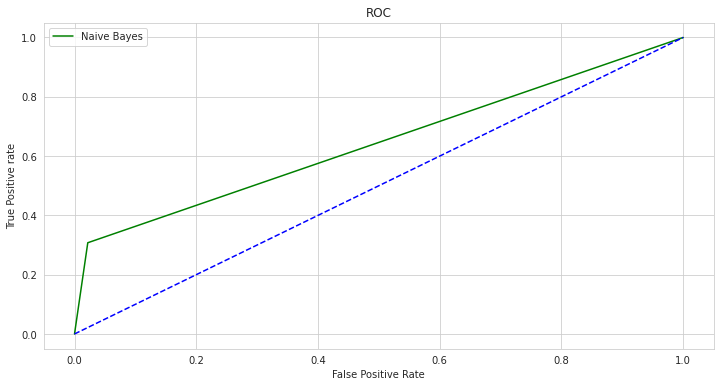

In [ ]:
eval(y_valid4, y_preds4)

[[4772   20]
 [   2    2]]
Precision: 0.09090909090909091
Recall   : 0.5
Accuracy : 0.9954128440366973
F1 score : 0.15384615384615385
AUC: 0.7479131886477463


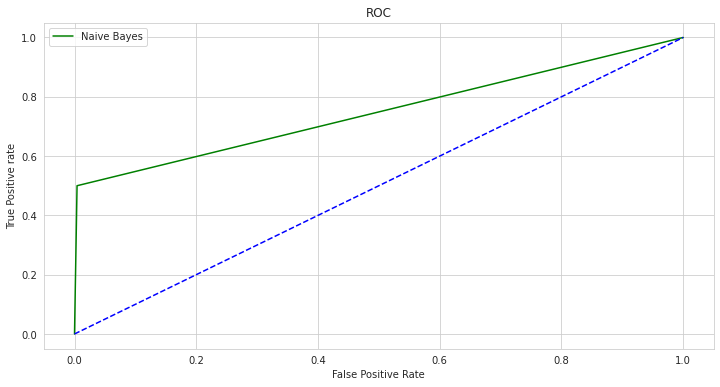

In [ ]:
eval(y_valid5, y_preds5)

[[4789    6]
 [   1    0]]
Recall   : 0.0
Accuracy : 0.9985404503753128
AUC: 0.49937434827945776


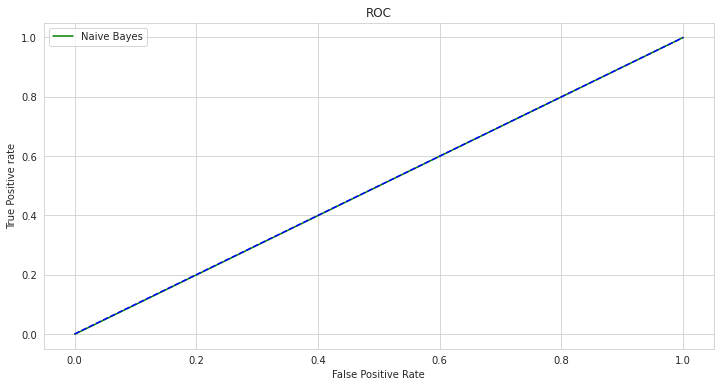

In [ ]:
eval(y_valid6, y_preds6)